### **Dataset:** [Credit Score Classification Dataset](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

### To Do

1. Data overview
2. Data preprocessing
3. Fix missing values
4. Data transformation
5. Model training
6. Performance evaluation
7. Performance improvement (Hyperparameter tuning & feature selection)
8. Comparative analysis


### Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [ ]:
! pip install pingouin

### Data Overview & Preprocessing

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/CSE477 Project/train.csv'

df = pd.read_csv(path, low_memory=False)
df.shape

(200000, 28)

In [ ]:
pd.set_option('display.max_columns', 30)

df

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      19114.12            1824.843333                  3   
1      Scientist      19114.12                    NaN                  3   
2      Scientist      19114.12                    NaN                  3   
3      Scientist      19114.12                    NaN                  3   
4      Scientist      19114.12            1824.843333                  3   
...          ...           ...                    ...                ...   
99995   Mechanic      39628.99            3359.415833                  4   
99996   Mechanic      39628.99            3359.415833                  4   
99997   Mechanic      39628.99            3359.415833                  4   
99998   Mechanic      39628.99            3359.415833                  4   
99999   Mechanic     39628.99_            3359.415833                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    4              3           4   
1                    4              3           4   
2                    4              3           4   
3                    4              3           4   
4                    4              3           4   
...                ...            ...         ...   
99995                6              7           2   
99996                6              7           2   
99997                6           5729           2   
99998                6              7           2   
99999                6              7           2   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                          7                11.27                   4.0   
1                        NaN                11.27                   4.0   
2                          7                    _                   4.0   
3                          4                 6.27                   4.0   
4                        NaN                11.27                   4.0   
...                      ...                  ...                   ...   
99995                      7                 11.5                   3.0   


In [ ]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [ ]:
df.duplicated().sum()

100000

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

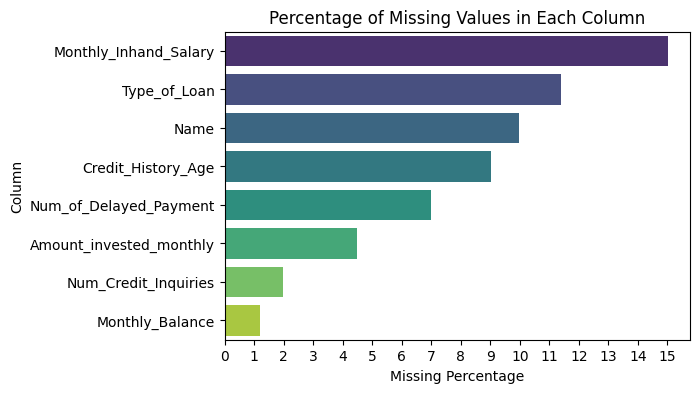

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({'Column': df.columns, 'MissingPercentage': missing_percentage})
missing_df = missing_df[missing_df['MissingPercentage'] > 0]

missing_df = missing_df.sort_values(by='MissingPercentage', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='MissingPercentage', y='Column', data=missing_df, palette='viridis')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Missing Percentage')
plt.ylabel('Column')
plt.xticks(np.arange(0, 16, 1))
plt.show()

In [ ]:
cols_to_drop = ['ID', 'Name', 'SSN']

df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
df.describe().T

count         mean          std         min  \
Monthly_Inhand_Salary      84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts         100000.0    17.091280   117.404834   -1.000000   
Num_Credit_Card           100000.0    22.474430   129.057410    0.000000   
Interest_Rate             100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date       100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries       98035.0    27.754251   193.177339    0.000000   
Credit_Utilization_Ratio  100000.0    32.285173     5.116875   20.000000   
Total_EMI_per_month       100000.0  1403.118217  8306.041270    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card              4.000000     5.000000     7.000000   1499.000000  
Interest_Rate                8.000000    13.000000    20.000000   5797.000000  
Delay_from_due_date         10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries         3.000000     6.000000     9.000000   2597.000000  
Credit_Utilization_Ratio    28.052567    32.305784    36.496663     50.000000  
Total_EMI_per_month         30.306660    69.249473   161.224249  82331.000000

In [ ]:
df.describe(exclude=np.number).T

count unique                               top  \
Customer_ID              100000  12500                         CUS_0xd40   
Month                    100000      8                           January   
Age                      100000   1788                                38   
Occupation               100000     16                           _______   
Annual_Income            100000  18940                          36585.12   
Num_of_Loan              100000    434                                 3   
Type_of_Loan              88592   6260                     Not Specified   
Num_of_Delayed_Payment    92998    749                                19   
Changed_Credit_Limit     100000   4384                                 _   
Credit_Mix               100000      4                          Standard   
Outstanding_Debt         100000  13178                           1360.45   
Credit_History_Age        90970    404            15 Years and 11 Months   
Payment_of_Min_Amount    100000      3                               Yes   
Amount_invested_monthly   95521  91049                         __10000__   
Payment_Behaviour        100000      7    Low_spent_Small_value_payments   
Monthly_Balance           98800  98792  __-333333333333333333333333333__   
Credit_Score             100000      3                          Standard   

                          freq  
Customer_ID                  8  
Month                    12500  
Age                       2833  
Occupation                7062  
Annual_Income               16  
Num_of_Loan              14386  
Type_of_Loan              1408  
Num_of_Delayed_Payment    5327  
Changed_Credit_Limit      2091  
Credit_Mix               36479  
Outstanding_Debt            24  
Credit_History_Age         446  
Payment_of_Min_Amount    52326  
Amount_invested_monthly   4305  
Payment_Behaviour        25513  
Monthly_Balance              9  
Credit_Score             53174

In [ ]:
cols_to_fix= [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in cols_to_fix:
    df[col] = df[col].str.replace('_', '')
    try:
        df[col] = df[col].astype('float')
    except:
        continue

df[cols_to_fix].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      100000 non-null  float64
 1   Annual_Income            100000 non-null  float64
 2   Num_of_Loan              100000 non-null  float64
 3   Num_of_Delayed_Payment   92998 non-null   float64
 4   Changed_Credit_Limit     100000 non-null  object 
 5   Outstanding_Debt         100000 non-null  float64
 6   Amount_invested_monthly  95521 non-null   float64
 7   Monthly_Balance          98800 non-null   float64
dtypes: float64(7), object(1)
memory usage: 6.9+ MB


In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype('float')

df[cols_to_fix].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      100000 non-null  float64
 1   Annual_Income            100000 non-null  float64
 2   Num_of_Loan              100000 non-null  float64
 3   Num_of_Delayed_Payment   92998 non-null   float64
 4   Changed_Credit_Limit     97909 non-null   float64
 5   Outstanding_Debt         100000 non-null  float64
 6   Amount_invested_monthly  95521 non-null   float64
 7   Monthly_Balance          98800 non-null   float64
dtypes: float64(8)
memory usage: 6.9 MB


In [ ]:
df.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000   1.000000e+05           84998.000000      100000.000000   
mean      110.649700   1.764157e+05            4194.170850          17.091280   
std       686.244717   1.429618e+06            3183.686167         117.404834   
min      -500.000000   7.005930e+03             303.645417          -1.000000   
25%        24.000000   1.945750e+04            1625.568229           3.000000   
50%        33.000000   3.757861e+04            3093.745000           6.000000   
75%        42.000000   7.279092e+04            5957.448333           7.000000   
max      8698.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count     100000.00000  100000.000000  100000.000000        100000.000000   
mean          22.47443      72.466040       3.009960            21.068780   
std          129.05741     466.422621      62.647879            14.860104   
min            0.00000       1.000000    -100.000000            -5.000000   
25%            4.00000       8.000000       1.000000            10.000000   
50%            5.00000      13.000000       3.000000            18.000000   
75%            7.00000      20.000000       5.000000            28.000000   
max         1499.00000    5797.000000    1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            92998.000000          97909.000000          98035.000000   
mean                30.923342             10.389025             27.754251   
std                226.031892              6.789496            193.177339   
min                 -3.000000             -6.490000              0.000000   
25%                  9.000000              5.320000              3.000000   
50%                 14.000000              9.400000              6.000000   
75%                 18.000000             14.870000              9.000000   
max               4397.000000             36.970000           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count     100000.000000             100000.000000        100000.000000   
mean        1426.220376                 32.285173          1403.118217   
std         1155.129026                  5.116875          8306.041270   
min            0.230000                 20.000000             0.000000   
25%          566.072500                 28.052567            30.306660   
50%         1166.155000                 32.305784            69.249473   
75%         1945.962500                 36.496663           161.224249   
max         4998.070000                 50.000000         82331.000000   

       Amount_invested_monthly  Monthly_Balance  
count             95521.000000     9.880000e+04  
mean                637.412998    -3.036437e+22  
std                2043.319327     3.181295e+24  
min                   0.000000    -3.333333e+26  
25%                  74.534002     2.700922e+02  
50%                 135.925682     3.367192e+02  
75%                 265.731733     4.702202e+02  
max               10000.000000     1.602041e+03

In [ ]:
columns_to_fix = ['Age', 'Num_Bank_Accounts', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit']

df[columns_to_fix] = df[columns_to_fix].applymap(lambda x: np.nan if x < 0 else x)

df[cols_to_fix].describe()

Age  Annual_Income   Num_of_Loan  Num_of_Delayed_Payment  \
count  99114.000000   1.000000e+05  96124.000000            92354.000000   
mean     116.108421   1.764157e+05      7.163622               31.150519   
std      686.861274   1.429618e+06     60.314923              226.802173   
min       14.000000   7.005930e+03      0.000000                0.000000   
25%       25.000000   1.945750e+04      2.000000                9.000000   
50%       33.000000   3.757861e+04      3.000000               14.000000   
75%       42.000000   7.279092e+04      5.000000               18.000000   
max     8698.000000   2.419806e+07   1496.000000             4397.000000   

       Changed_Credit_Limit  Outstanding_Debt  Amount_invested_monthly  \
count          96323.000000     100000.000000             95521.000000   
mean              10.599042       1426.220376               637.412998   
std                6.639966       1155.129026              2043.319327   
min                0.000000          0.230000                 0.000000   
25%                5.570000        566.072500                74.534002   
50%                9.520000       1166.155000               135.925682   
75%               15.010000       1945.962500               265.731733   
max               36.970000       4998.070000             10000.000000   

       Monthly_Balance  
count     9.880000e+04  
mean     -3.036437e+22  
std       3.181295e+24  
min      -3.333333e+26  
25%       2.700922e+02  
50%       3.367192e+02  
75%       4.702202e+02  
max       1.602041e+03

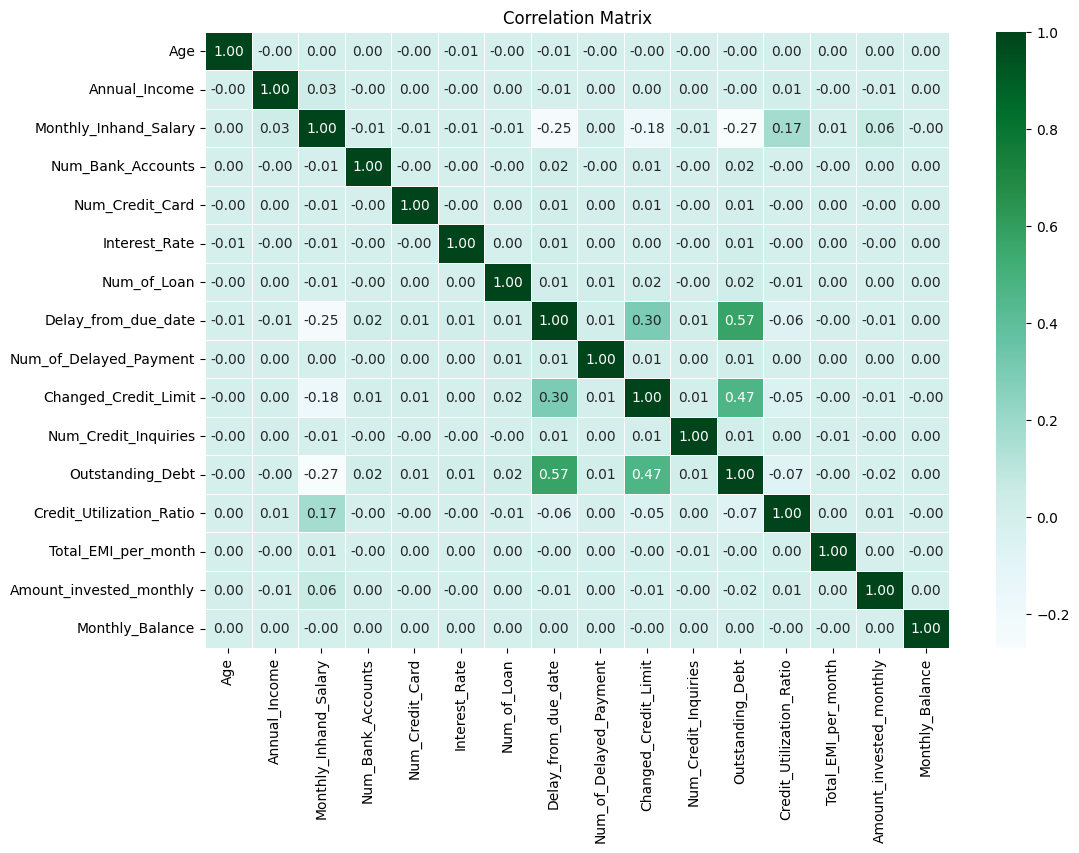

In [ ]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       99114 non-null   float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         99979 non-null   float64
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               96124 non-null   float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92354 non-null   float64
 13  Changed_Credit_Limit      96323 non-null   fl

In [ ]:
df_categorical = df[df.select_dtypes(include=['object']).columns]
df_categorical.head()

Customer_ID     Month Occupation  \
0   CUS_0xd40   January  Scientist   
1   CUS_0xd40  February  Scientist   
2   CUS_0xd40     March  Scientist   
3   CUS_0xd40     April  Scientist   
4   CUS_0xd40       May  Scientist   

                                        Type_of_Loan Credit_Mix  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...          _   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...       Good   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...       Good   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...       Good   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...       Good   

      Credit_History_Age Payment_of_Min_Amount  \
0  22 Years and 1 Months                    No   
1                    NaN                    No   
2  22 Years and 3 Months                    No   
3  22 Years and 4 Months                    No   
4  22 Years and 5 Months                    No   

                  Payment_Behaviour Credit_Score  
0   High_spent_Small_value_payments         Good  
1    Low_spent_Large_value_payments         Good  
2   Low_spent_Medium_value_payments         Good  
3    Low_spent_Small_value_payments         Good  
4  High_spent_Medium_value_payments         Good

In [ ]:
for i in df.select_dtypes(include='object').columns.tolist():
    print(f'{i} value counts:')
    print(df[i].value_counts())
    print()

Customer_ID value counts:
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64

Month value counts:
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

Occupation value counts:
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

Type_of_Loan value counts:
Not Specified                                                                                                              

In [ ]:
def to_months(val):
    if pd.isnull(val):
        return val

    x = int(val.split(' ')[0])
    y = int(val.split(' ')[3])

    return x * 12 + y

df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: to_months(x)).astype(float)

In [ ]:
df['Payment_of_Min_Amount'].replace('NM', 'No', inplace=True)

In [ ]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [ ]:
df['Occupation'] = df['Occupation'].replace('_______', np.nan)

In [ ]:
df['Credit_Mix']= df['Credit_Mix'].replace('_', np.nan)

In [ ]:
df['Customer_ID'] = df['Customer_ID'].apply(lambda x: int(x[4:], 16))

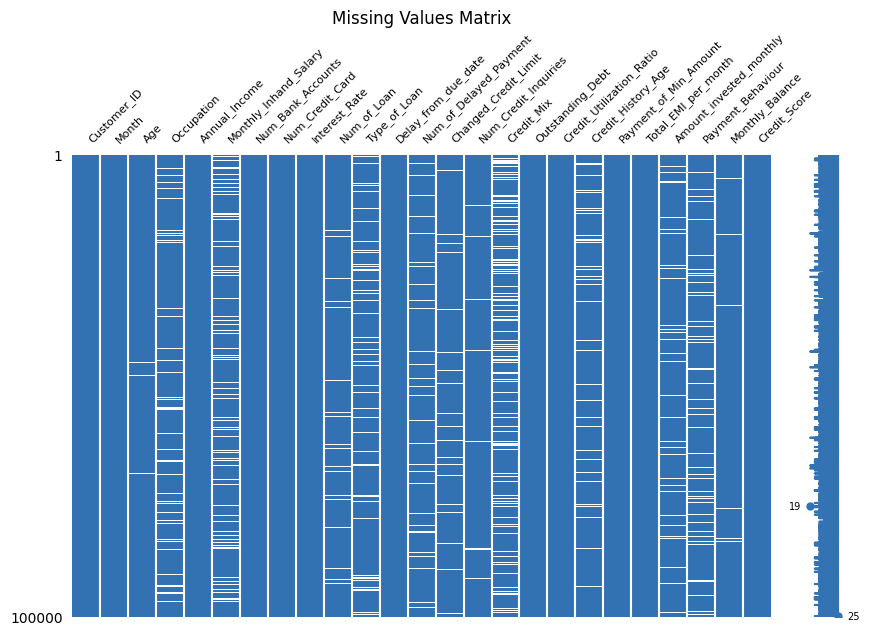

In [ ]:
import missingno as msno

msno.matrix(df, figsize=(10, 6), color=(0.2, 0.45, 0.7), fontsize=8)
plt.title('Missing Values Matrix')
plt.show()

In [ ]:
df[df['Occupation'].isna()].head()

Customer_ID    Month   Age Occupation  Annual_Income  \
8          8625  January  28.0        NaN       34847.84   
16        11708  January  34.0        NaN      143162.64   
18        11708    March  34.0        NaN      143162.64   
20        11708      May  34.0        NaN      143162.64   
29        47249     June  55.0        NaN       30689.89   

    Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
8             3037.986667                2.0                4              6   
16           12187.220000                1.0                5              8   
18                    NaN                1.0                5              8   
20           12187.220000                1.0                5              8   
29            2612.490833                2.0                5              4   

    Num_of_Loan                             Type_of_Loan  Delay_from_due_date  \
8           1.0                      Credit-Builder Loan                    3   
16          3.0  Auto Loan, Auto Loan, and Not Specified                    5   
18          3.0  Auto Loan, Auto Loan, and Not Specified                    8   
20          3.0  Auto Loan, Auto Loan, and Not Specified                   10   
29          1.0                            Not Specified                    5   

    Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
8                      4.0                  5.42                   2.0   
16                     8.0                  7.10                   3.0   
18                     7.0                 11.10                   NaN   
20                     5.0                  7.10                   3.0   
29                     6.0                   NaN                   4.0   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
8        Good            605.03                 24.464031               319.0   
16       Good           1303.01                 28.616735               213.0   
18       Good           1303.01                 26.519815               215.0   
20       Good           1303.01                 31.376150               217.0   
29        NaN            632.46                 27.445422               212.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
8                     No            18.816215               104.291825   
16                    No           246.992319               168.413703   
18                    No           246.992319             10000.000000   
20                    No           246.992319               430.947528   
29                    No            16.415452                84.952848   

                  Payment_Behaviour  Monthly_Balance Credit_Score  
8    Low_spent_Small_value_payments       470.690627     Standard  
16                              NaN      1043.315978         Good  
18  High_spent_Small_value_payments       715.741367         Good  
20   Low_spent_Large_value_payments       810.782153         Good  
29  High_spent_Small_value_payments       419.880784     Standard

In [ ]:
df[df['Customer_ID'] == 8625]

Customer_ID     Month   Age Occupation  Annual_Income  \
8          8625   January  28.0        NaN       34847.84   
9          8625  February  28.0    Teacher       34847.84   
10         8625     March  28.0    Teacher       34847.84   
11         8625     April  28.0    Teacher       34847.84   
12         8625       May  28.0    Teacher       34847.84   
13         8625      June  28.0    Teacher       34847.84   
14         8625      July  28.0    Teacher       34847.84   
15         8625    August  28.0    Teacher       34847.84   

    Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
8             3037.986667                2.0                4              6   
9             3037.986667                2.0                4              6   
10            3037.986667                2.0             1385              6   
11                    NaN                2.0                4              6   
12            3037.986667                2.0                4              6   
13            3037.986667                2.0                4              6   
14                    NaN                2.0                4              6   
15            3037.986667                2.0                4              6   

    Num_of_Loan         Type_of_Loan  Delay_from_due_date  \
8           1.0  Credit-Builder Loan                    3   
9           1.0  Credit-Builder Loan                    7   
10          1.0  Credit-Builder Loan                    3   
11          1.0  Credit-Builder Loan                    3   
12          1.0  Credit-Builder Loan                    3   
13          1.0  Credit-Builder Loan                    3   
14          1.0  Credit-Builder Loan                    3   
15          1.0  Credit-Builder Loan                    3   

    Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
8                      4.0                  5.42                   2.0   
9                      1.0                  7.42                   2.0   
10                     NaN                  5.42                   2.0   
11                     3.0                  5.42                   2.0   
12                     1.0                  6.42                   2.0   
13                     0.0                  5.42                   2.0   
14                     4.0                  5.42                   2.0   
15                     4.0                  5.42                   2.0   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
8        Good            605.03                 24.464031               319.0   
9        Good            605.03                 38.550848               320.0   
10        NaN            605.03                 33.224951               321.0   
11       Good            605.03                 39.182656               322.0   
12       Good            605.03                 34.977895               323.0   
13       Good            605.03                 33.381010               324.0   
14       Good            605.03                 31.131702               325.0   
15       Good            605.03                 32.933856               326.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
8                     No            18.816215               104.291825   
9                     No            18.816215                40.391238   
10                    No            18.816215                58.515976   
11                    No            18.816215                99.306228   
12                    No            18.816215               130.115420   
13                    No            18.816215                43.477190   
14                    No            18.816215                70.101774   
15                    No            18.816215               218.904344   

                   Payment_Behaviour  Monthly_Balance Credit_Score  
8     Low_spent_Small_value_payments       470.690

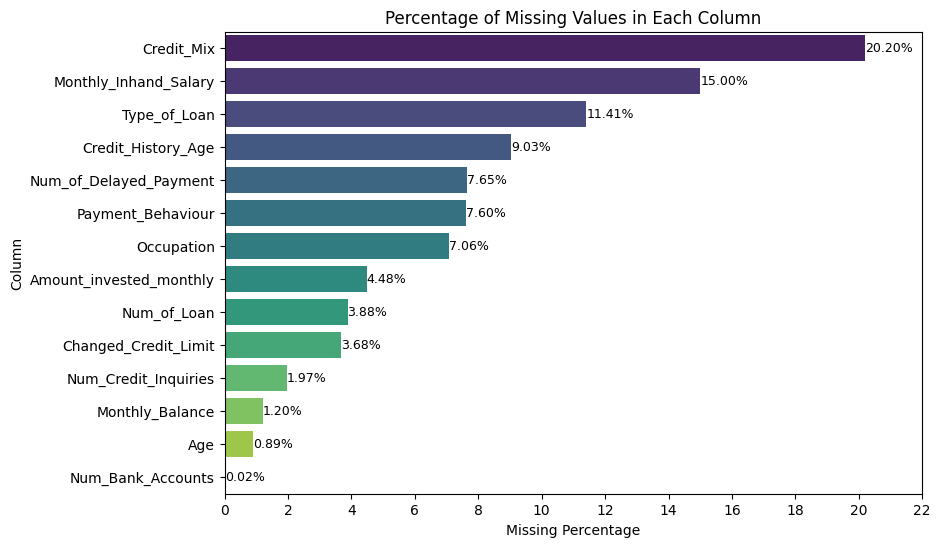

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Column': df.columns, 'MissingPercentage': missing_percentage})

missing_df = missing_df[missing_df['MissingPercentage'] > 0]

missing_df = missing_df.sort_values(by='MissingPercentage', ascending=False)

plt.figure(figsize=(9, 6))
barplot = sns.barplot(x='MissingPercentage', y='Column', data=missing_df, palette='viridis')

for index, value in enumerate(missing_df['MissingPercentage']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha='left', va='center', fontsize=9)

plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Missing Percentage')
# plt.ylabel('Column')
plt.xticks(np.arange(0, 23, 2))
plt.show()

In [ ]:
df.isna().sum()

Customer_ID                     0
Month                           0
Age                           886
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts              21
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3876
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7646
Changed_Credit_Limit         3677
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

### Handling Missing Value & Outliers

In [ ]:
def fill_na_cat(data, val):
    nan_idx = list(data[val][data[val].isnull()].index)

    for i in nan_idx:
        val_pred = data[val][data['Customer_ID'] == data.iloc[i]['Customer_ID']].mode()[0]

        if not pd.isna(val_pred):
            data.loc[i, val] = val_pred
        else:
            data.loc[i, val] = data[val].mode()[0]

    return list(data[val])

In [ ]:
missing_cat_cols = set(missing_df['Column'].tolist()).intersection(df.select_dtypes(include='object').columns.tolist())
missing_cat_cols

{'Credit_Mix', 'Occupation', 'Payment_Behaviour', 'Type_of_Loan'}

In [ ]:
missing_cat_cols.remove('Type_of_Loan')

for col in missing_cat_cols:
    df[col] = fill_na_cat(df, col)
    print(f'Filled {col} column')

Filled Occupation column
Filled Credit_Mix column
Filled Payment_Behaviour column


In [ ]:
def fill_na_num(data, val):
    nan_idx = list(data[val][data[val].isnull()].index)

    for i in nan_idx:
        val_pred = data[val][data['Customer_ID'] == data.iloc[i]['Customer_ID']].median()

        if not pd.isna(val_pred):
            data.loc[i, val] = val_pred
        else:
            data.loc[i, val] = data[val].median()

    return data[val]

In [ ]:
missing_num_cols = set(missing_df['Column'].tolist()).intersection(df.select_dtypes(exclude='object').columns.tolist())

for col in missing_num_cols:
    df[col] = fill_na_num(df, col)
    print(f'Filled {col} column')

Filled Num_of_Loan column
Filled Num_Bank_Accounts column
Filled Changed_Credit_Limit column
Filled Amount_invested_monthly column
Filled Monthly_Balance column
Filled Credit_History_Age column
Filled Num_of_Delayed_Payment column
Filled Monthly_Inhand_Salary column
Filled Num_Credit_Inquiries column
Filled Age column


In [ ]:
df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [ ]:
loan_types = {}

for idx, row in df.iterrows():
    vals = row['Type_of_Loan']
    if pd.isnull(vals): continue

    vals = vals.replace('and', '').split(', ')
    for val in vals:
        val = val.strip()
        loan_types[val] = loan_types.get(val, 0) + 1

for k, v in loan_types.items():
    print(f'{k}: {v}')

Auto Loan: 37992
Credit-Builder Loan: 40440
Personal Loan: 38888
Home Equity Loan: 39104
Not Specified: 39616
Mortgage Loan: 38936
Student Loan: 38968
Debt Consolidation Loan: 38776
Payday Loan: 40568


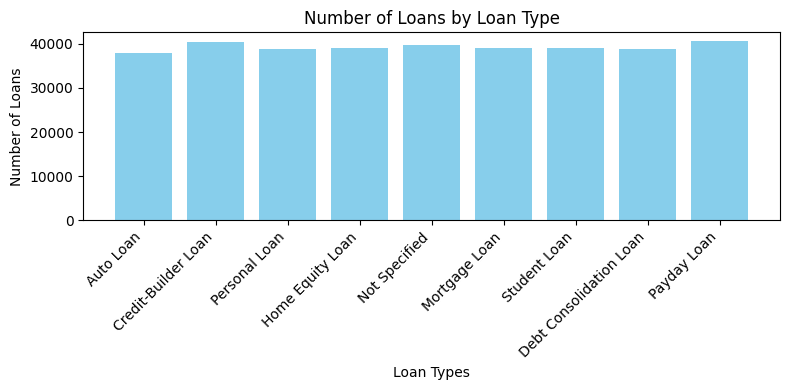

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(loan_types.keys(), loan_types.values(), color='skyblue')
plt.xlabel('Loan Types')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by Loan Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['Type_of_Loan'].isna().sum() / len(df) * 100

11.408

In [ ]:
df.dropna(inplace=True)

In [ ]:
col_map = {True: 1, False: 0}

for i in list(loan_types.keys()):
    df[i] = df['Type_of_Loan'].str.contains(i).map(col_map)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88592 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               88592 non-null  int64  
 1   Month                     88592 non-null  object 
 2   Age                       88592 non-null  float64
 3   Occupation                88592 non-null  object 
 4   Annual_Income             88592 non-null  float64
 5   Monthly_Inhand_Salary     88592 non-null  float64
 6   Num_Bank_Accounts         88592 non-null  float64
 7   Num_Credit_Card           88592 non-null  int64  
 8   Interest_Rate             88592 non-null  int64  
 9   Num_of_Loan               88592 non-null  float64
 10  Type_of_Loan              88592 non-null  object 
 11  Delay_from_due_date       88592 non-null  int64  
 12  Num_of_Delayed_Payment    88592 non-null  float64
 13  Changed_Credit_Limit      88592 non-null  float64
 14  Num_Cr

In [ ]:
df.drop(['Type_of_Loan', 'Not Specified'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88592 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               88592 non-null  int64  
 1   Month                     88592 non-null  object 
 2   Age                       88592 non-null  float64
 3   Occupation                88592 non-null  object 
 4   Annual_Income             88592 non-null  float64
 5   Monthly_Inhand_Salary     88592 non-null  float64
 6   Num_Bank_Accounts         88592 non-null  float64
 7   Num_Credit_Card           88592 non-null  int64  
 8   Interest_Rate             88592 non-null  int64  
 9   Num_of_Loan               88592 non-null  float64
 10  Delay_from_due_date       88592 non-null  int64  
 11  Num_of_Delayed_Payment    88592 non-null  float64
 12  Changed_Credit_Limit      88592 non-null  float64
 13  Num_Credit_Inquiries      88592 non-null  float64
 14  Credit

In [ ]:
y = df['Credit_Score']
df = df.drop('Credit_Score', axis=1)
df['Credit_Score'] = y

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns[1:-8].tolist()
len(num_cols)

17

In [ ]:
num_cols

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

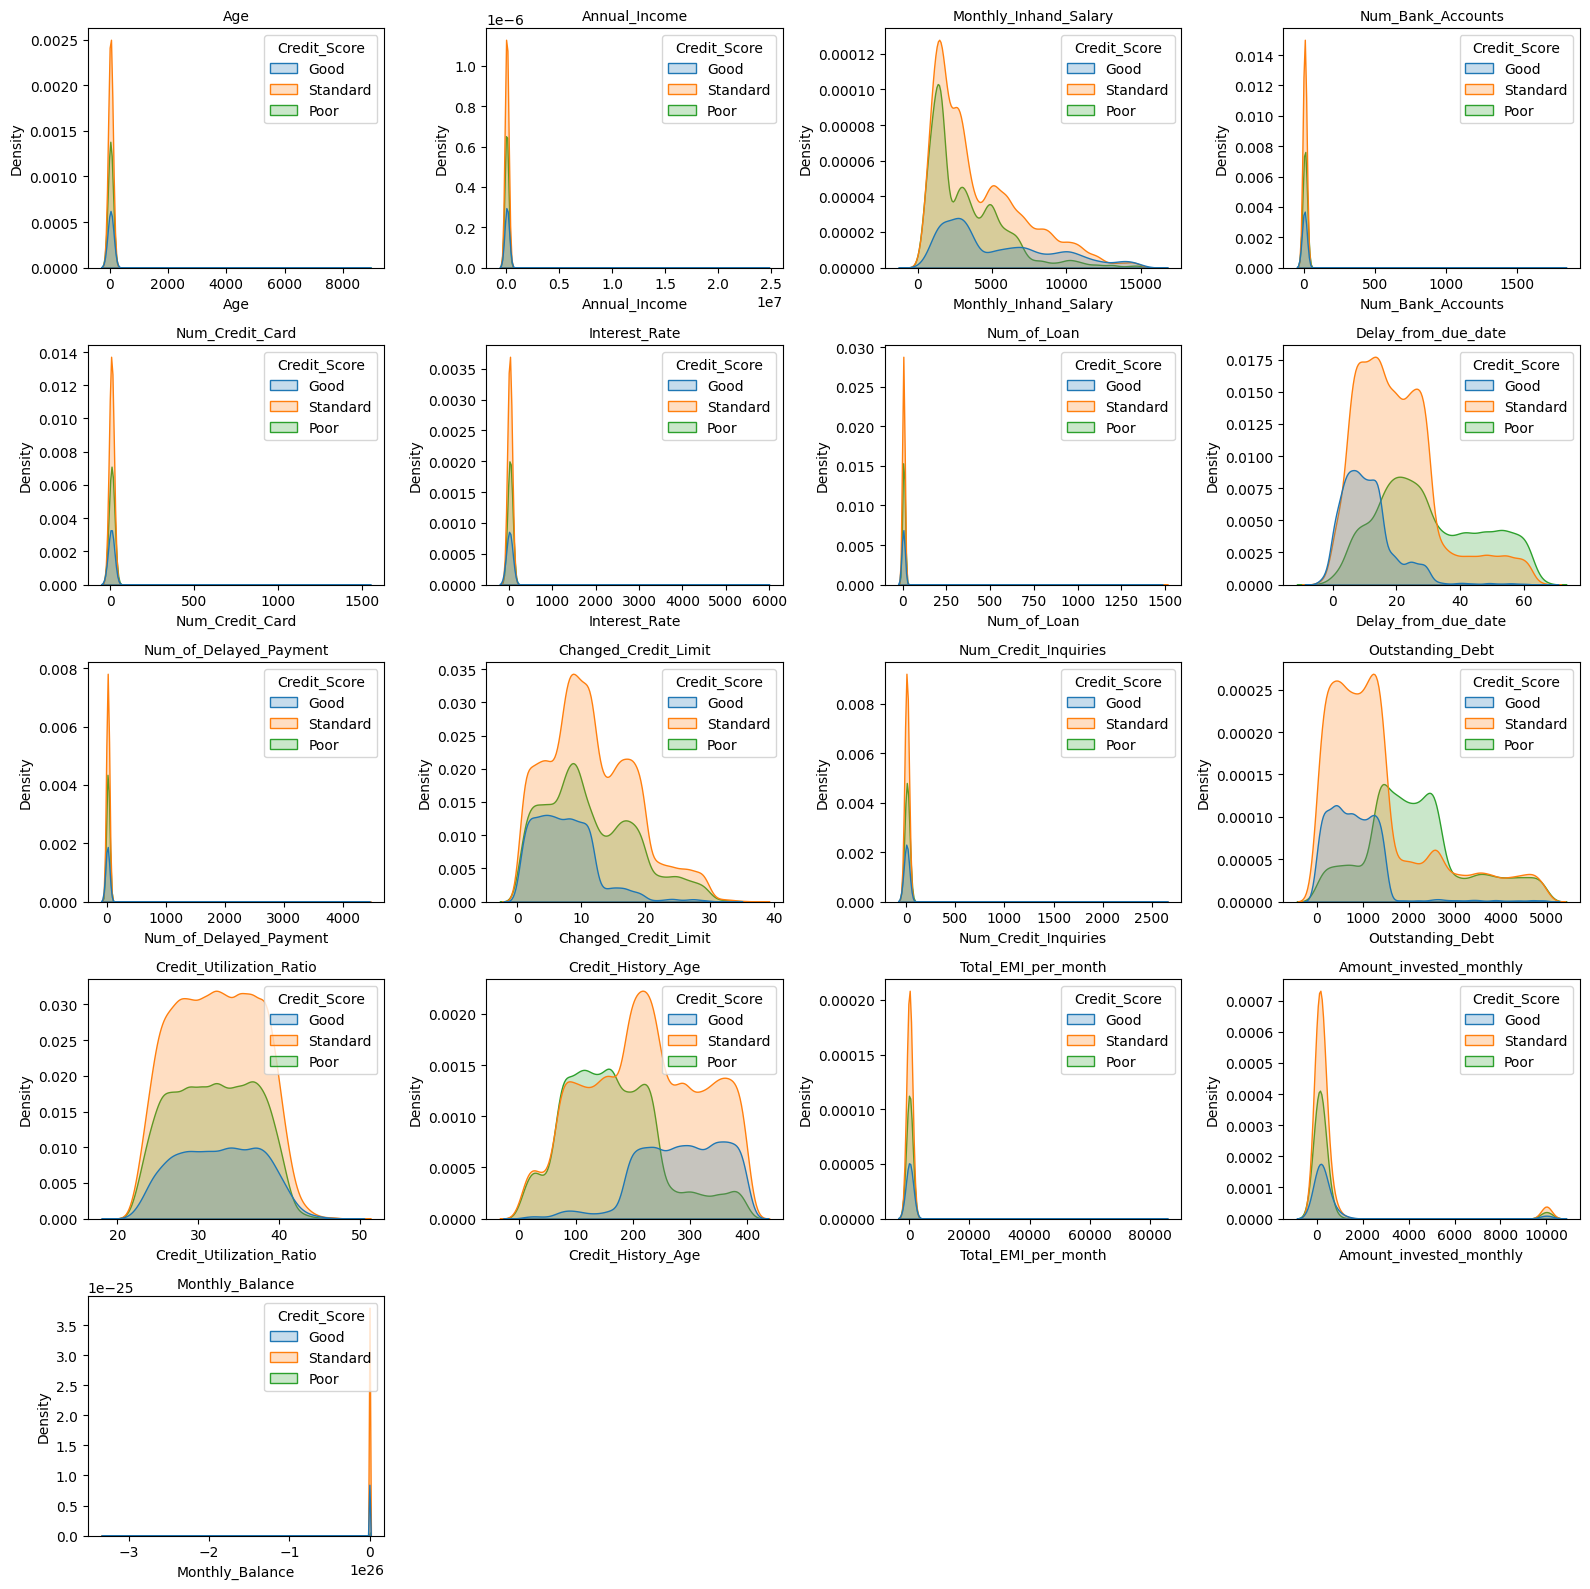

In [ ]:
plt.figure(figsize=(16, 16))

for ax, col in enumerate(num_cols):
    plt.subplot(5, 4, ax + 1)
    plt.title(col, fontsize=10)
    sns.kdeplot(x=df[col], shade=True, hue=df['Credit_Score'])

plt.tight_layout()
plt.show()

In [ ]:
def outlier_thresholds(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return lower_limit, upper_limit

def check_outlier(data, col_name):
    lower_limit, upper_limit = outlier_thresholds(data, col_name)

    outliers = data[(data[col_name] > upper_limit) | (data[col_name] < lower_limit)]
    percentage_outliers = (len(outliers) / len(data)) * 100

    return outliers.any(axis=None), round(percentage_outliers, 2)

In [ ]:
outlier_results = pd.DataFrame(columns=['Column', 'Has_Outliers'])

for col in num_cols:
    has_outliers, percentage = check_outlier(df, col)
    outlier_results = outlier_results.append({'Column': col, 'Has_Outliers': has_outliers, 'Percentage': percentage}, ignore_index=True)

outlier_results = outlier_results[outlier_results['Has_Outliers'] == True]
outlier_results = outlier_results[outlier_results['Percentage'] > 1]
outlier_results = outlier_results.sort_values(by='Percentage')
outlier_results

Column Has_Outliers  Percentage
3         Num_Bank_Accounts         True        1.31
10     Num_Credit_Inquiries         True        1.64
0                       Age         True        1.88
5             Interest_Rate         True        2.05
4           Num_Credit_Card         True        2.24
2     Monthly_Inhand_Salary         True        2.31
1             Annual_Income         True        2.94
7       Delay_from_due_date         True        3.27
11         Outstanding_Debt         True        3.44
14      Total_EMI_per_month         True        6.55
16          Monthly_Balance         True        7.76
15  Amount_invested_monthly         True       10.49

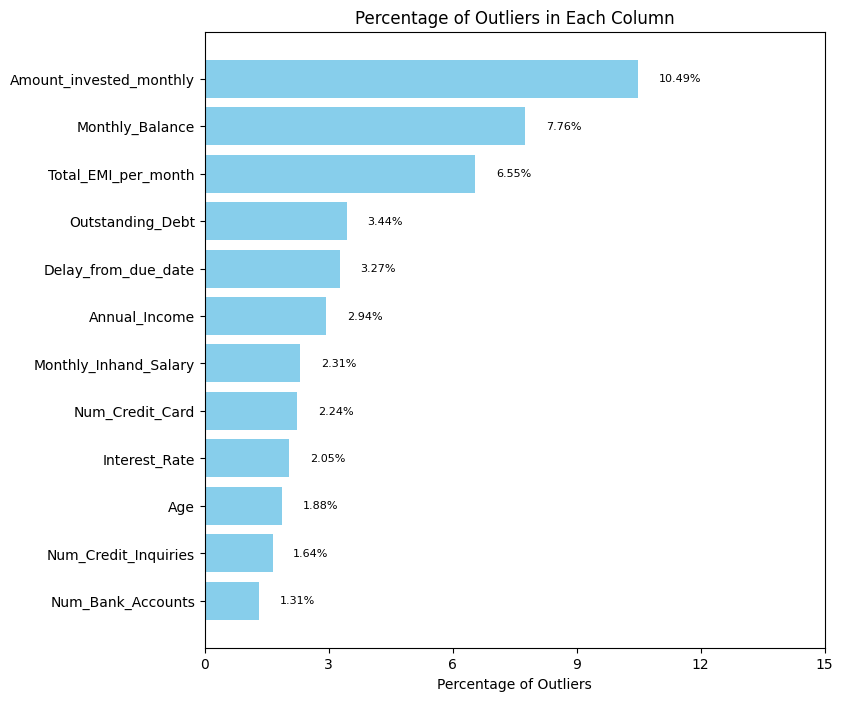

In [ ]:
plt.figure(figsize=(8, 8))
bars = plt.barh(outlier_results['Column'], outlier_results['Percentage'], color='skyblue')
plt.xlabel('Percentage of Outliers')
plt.title('Percentage of Outliers in Each Column')
plt.xticks(np.arange(0, 16, 3))

for bar, label in zip(bars, outlier_results['Percentage']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{label:.2f}%', va='center', fontsize=8)

plt.show()

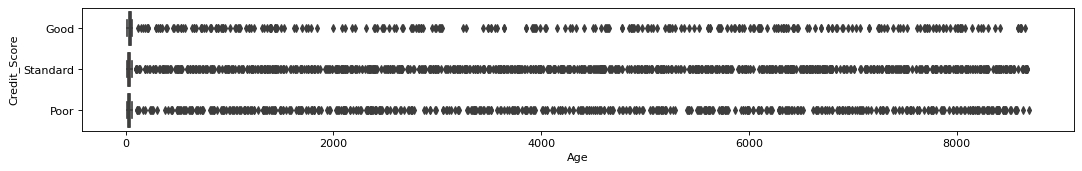

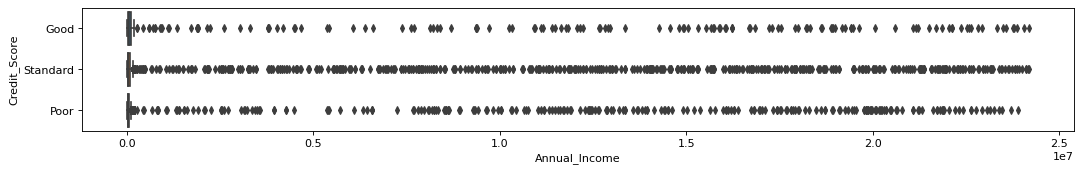

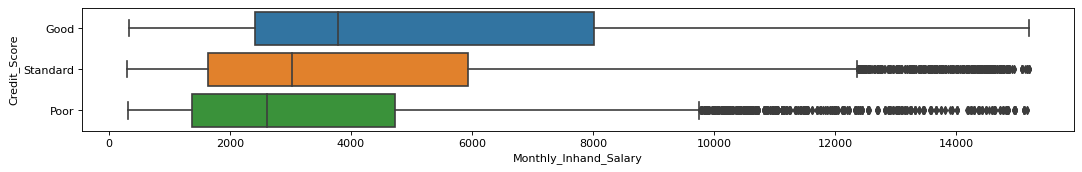

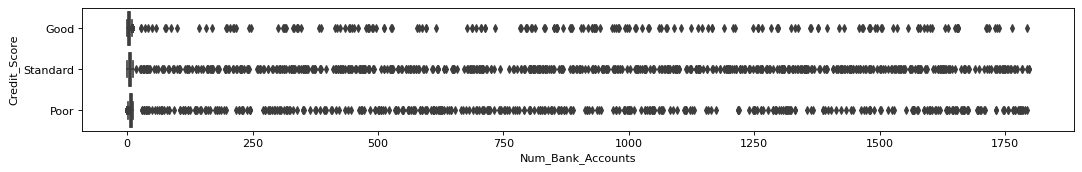

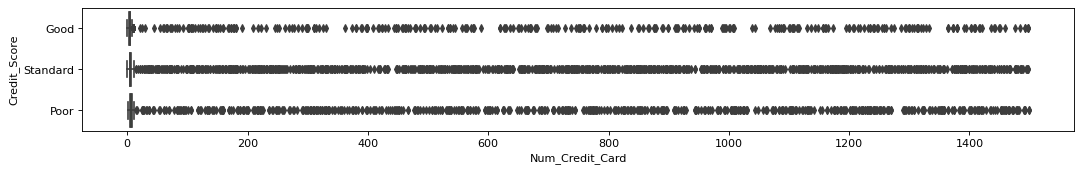

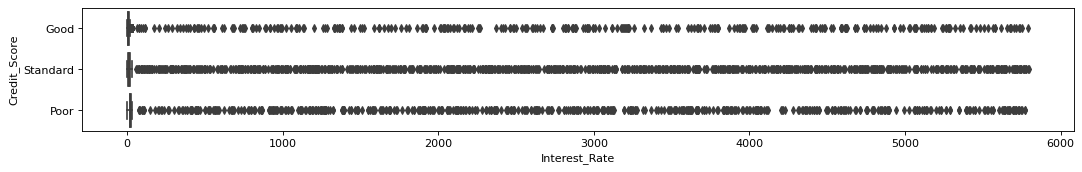

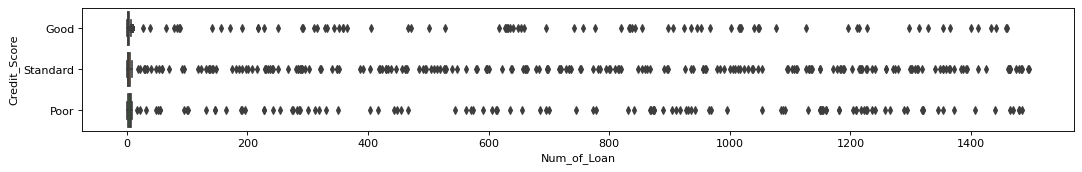

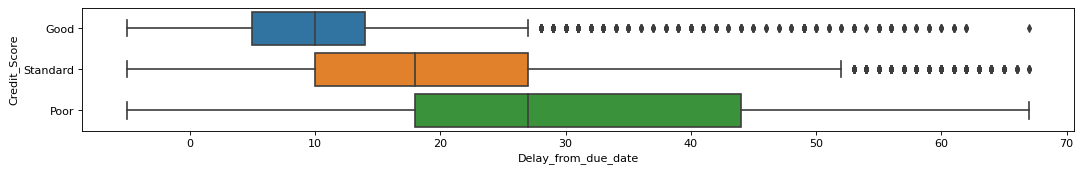

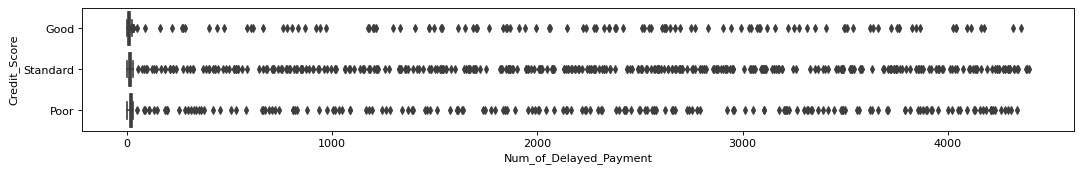

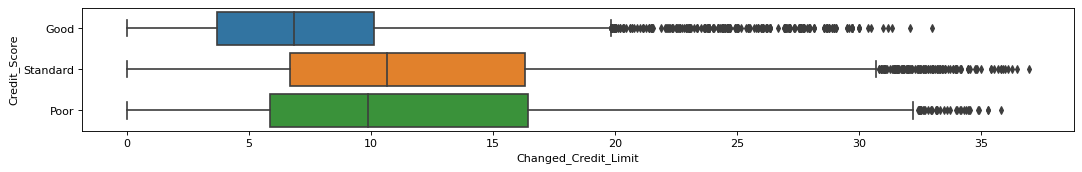

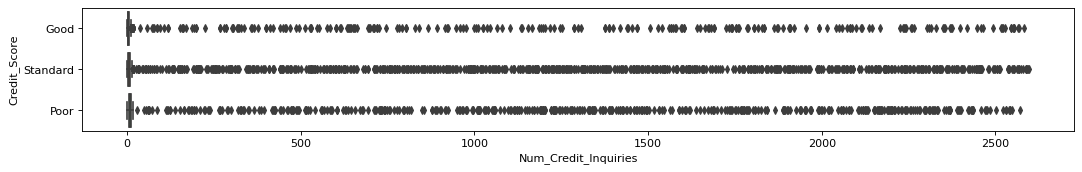

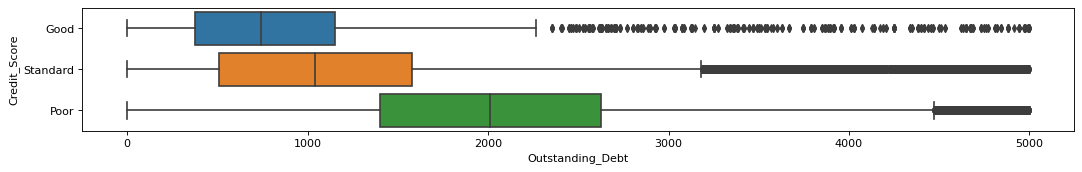

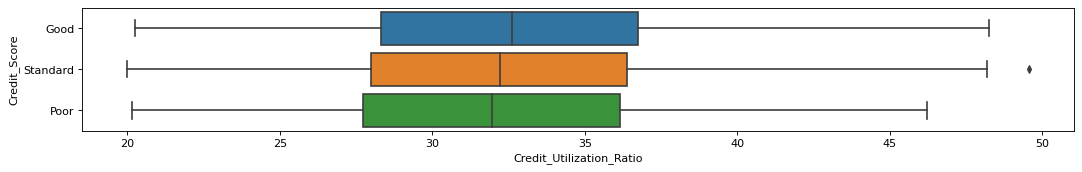

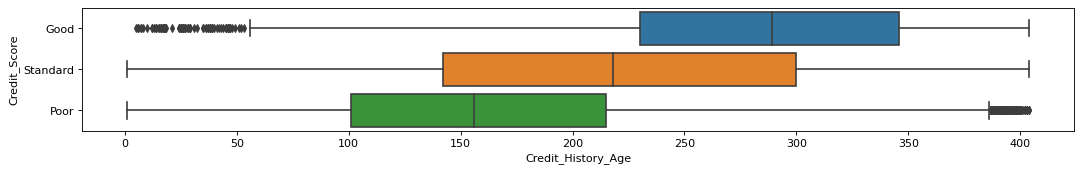

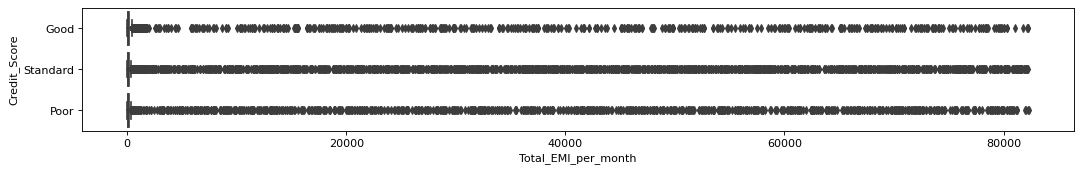

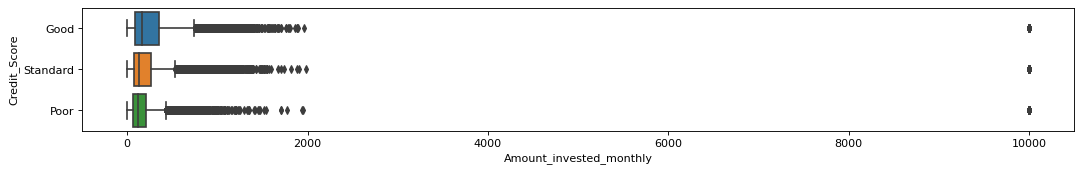

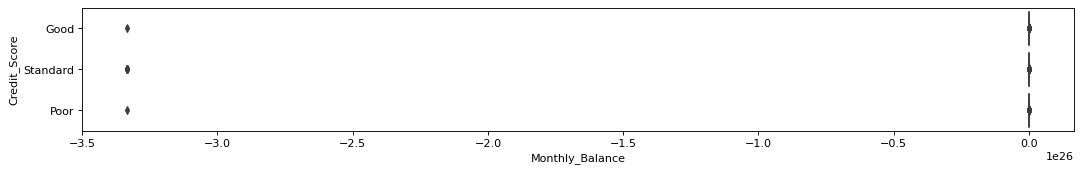

In [ ]:
for ax, col in enumerate(num_cols):
    plt.figure(figsize=(16, 2), dpi=80)
    sns.boxplot(x = df[col], y=df['Credit_Score'], data = df, orient='h')
    plt.show()

In [ ]:
def replace_with_thresholds(data, col):
    lower_limit, upper_limit = outlier_thresholds(data, col)

    data.loc[(data[col] < lower_limit), col] = lower_limit
    data.loc[(data[col] > upper_limit), col] = upper_limit

for col in num_cols:
    replace_with_thresholds(df, col)

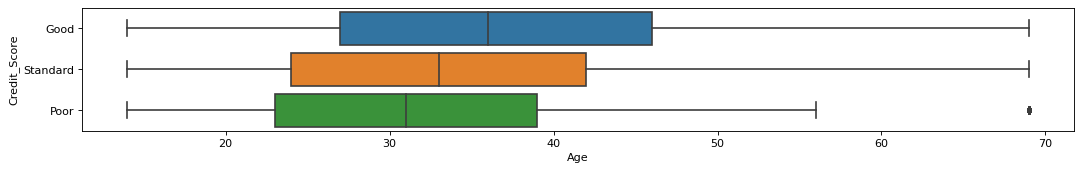

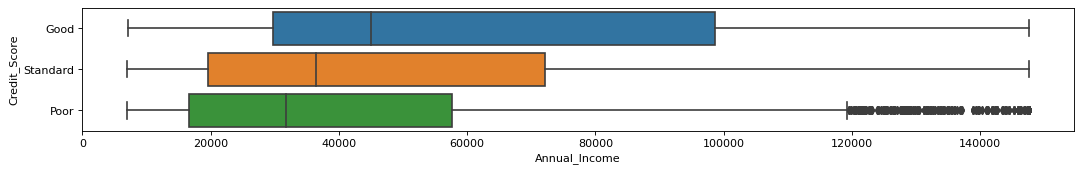

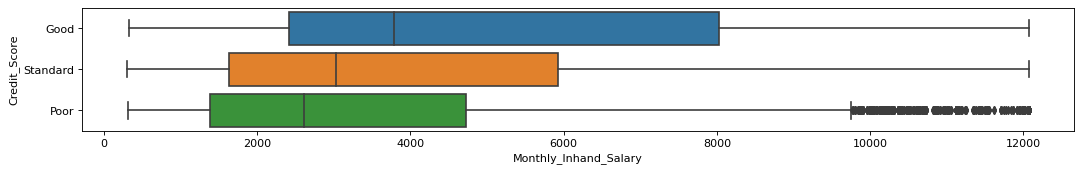

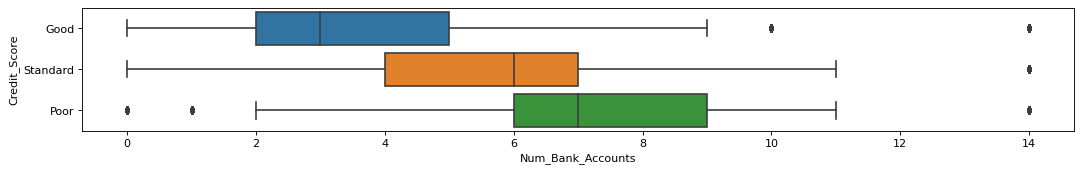

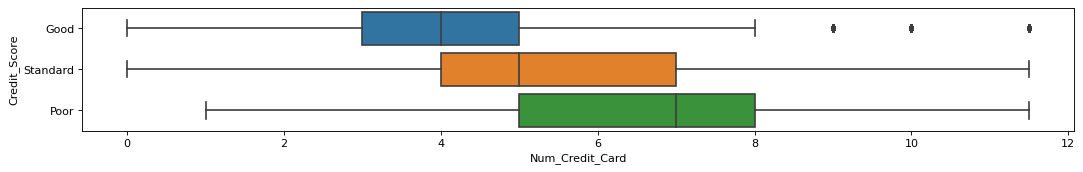

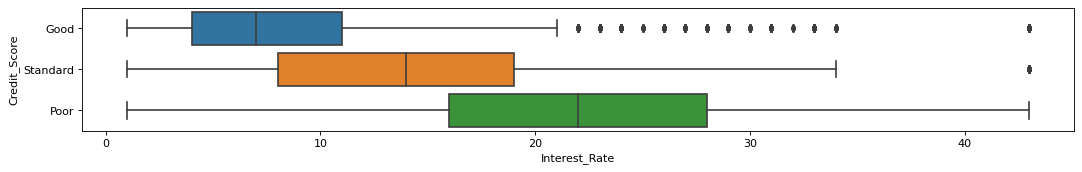

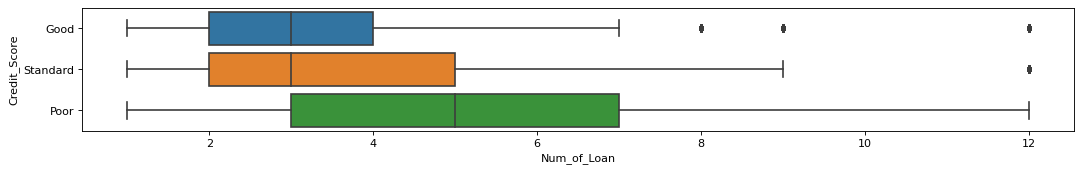

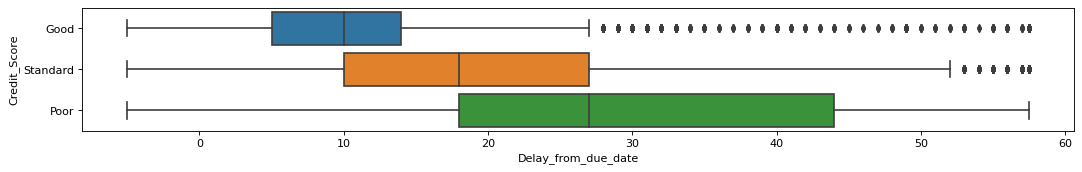

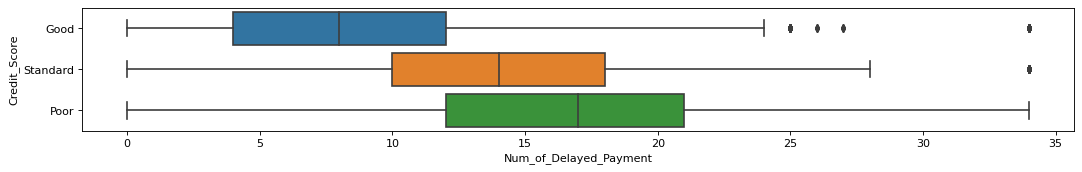

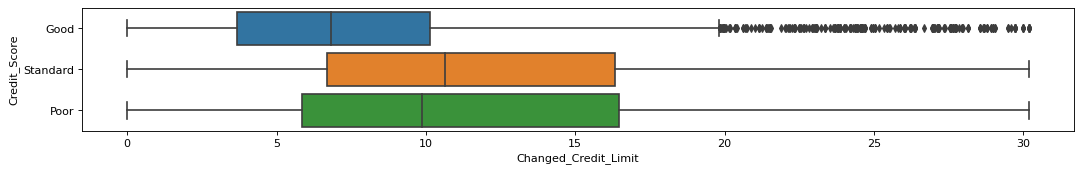

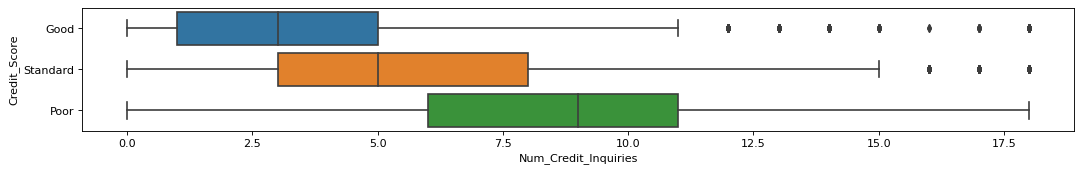

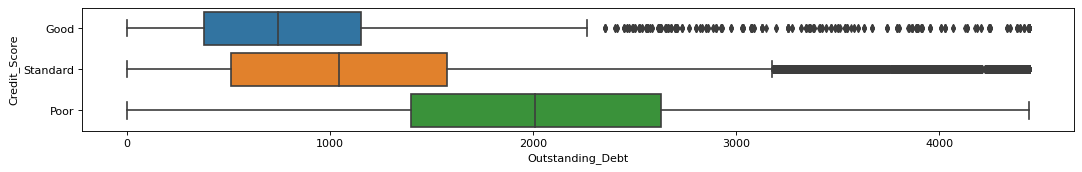

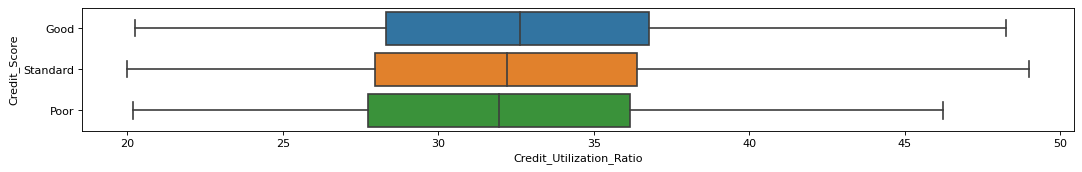

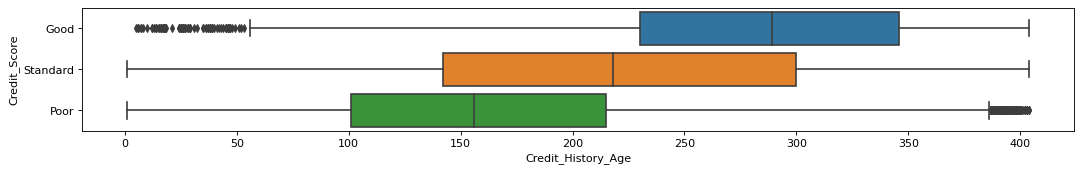

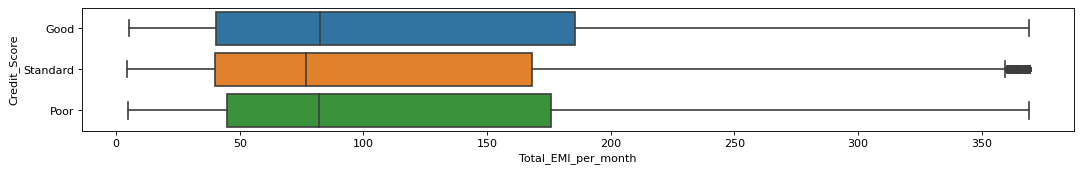

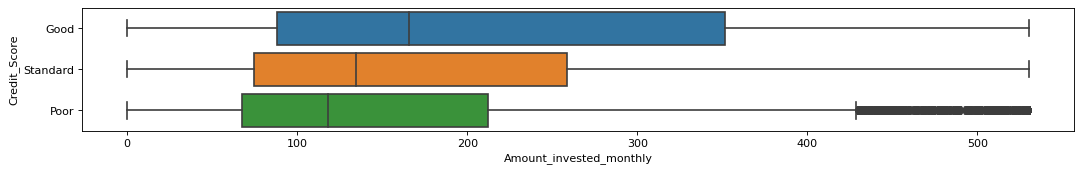

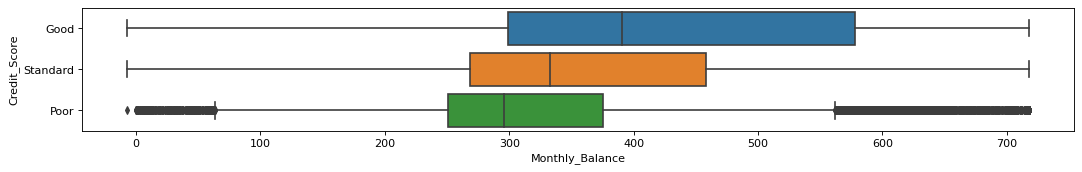

In [ ]:
for ax, col in enumerate(num_cols):
    plt.figure(figsize=(16, 2), dpi=80)
    sns.boxplot(x = df[col], y=df['Credit_Score'], data = df, orient='h')
    plt.show()

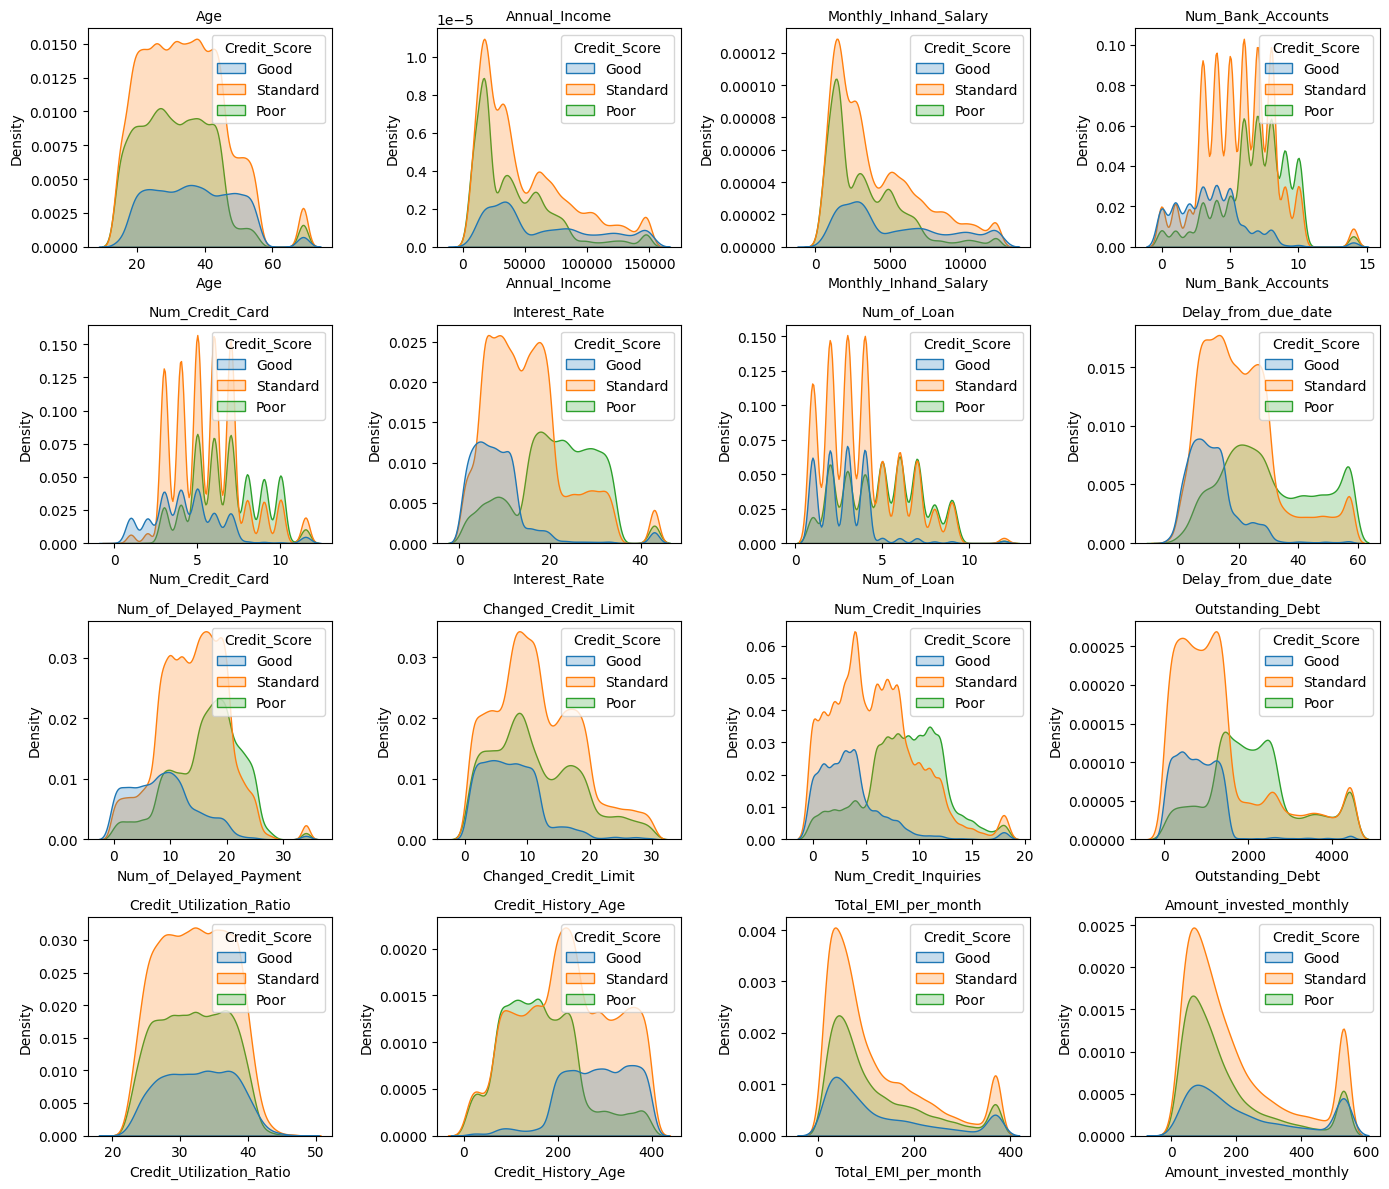

In [ ]:
plt.figure(figsize=(14, 12))

for ax, col in enumerate(num_cols[:-1]):
    plt.subplot(4, 4, ax + 1)
    plt.title(col, fontsize=10)
    sns.kdeplot(x=df[col], shade=True, hue=df['Credit_Score'])

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

credit_score_counts = df['Credit_Score'].value_counts().reset_index()

fig = px.pie(credit_score_counts, values='Credit_Score', names='index',
             title='Distribution of Credit Score',
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1], marker=dict(line=dict(color='white', width=2)))

fig.update_layout(
    title=dict(x=0.5, y=0.95, text='Distribution of Credit Score', xanchor='center', yanchor='top'),
    height=500,
    width=500
)

fig.show()

In [ ]:
df['Credit_Score'].value_counts()

Standard    46546
Poor        27662
Good        14384
Name: Credit_Score, dtype: int64

In [ ]:
label_map = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}

df['Credit_Score'] = df['Credit_Score'].map(label_map)

df['Credit_Score'].value_counts()

1    46546
0    27662
2    14384
Name: Credit_Score, dtype: int64

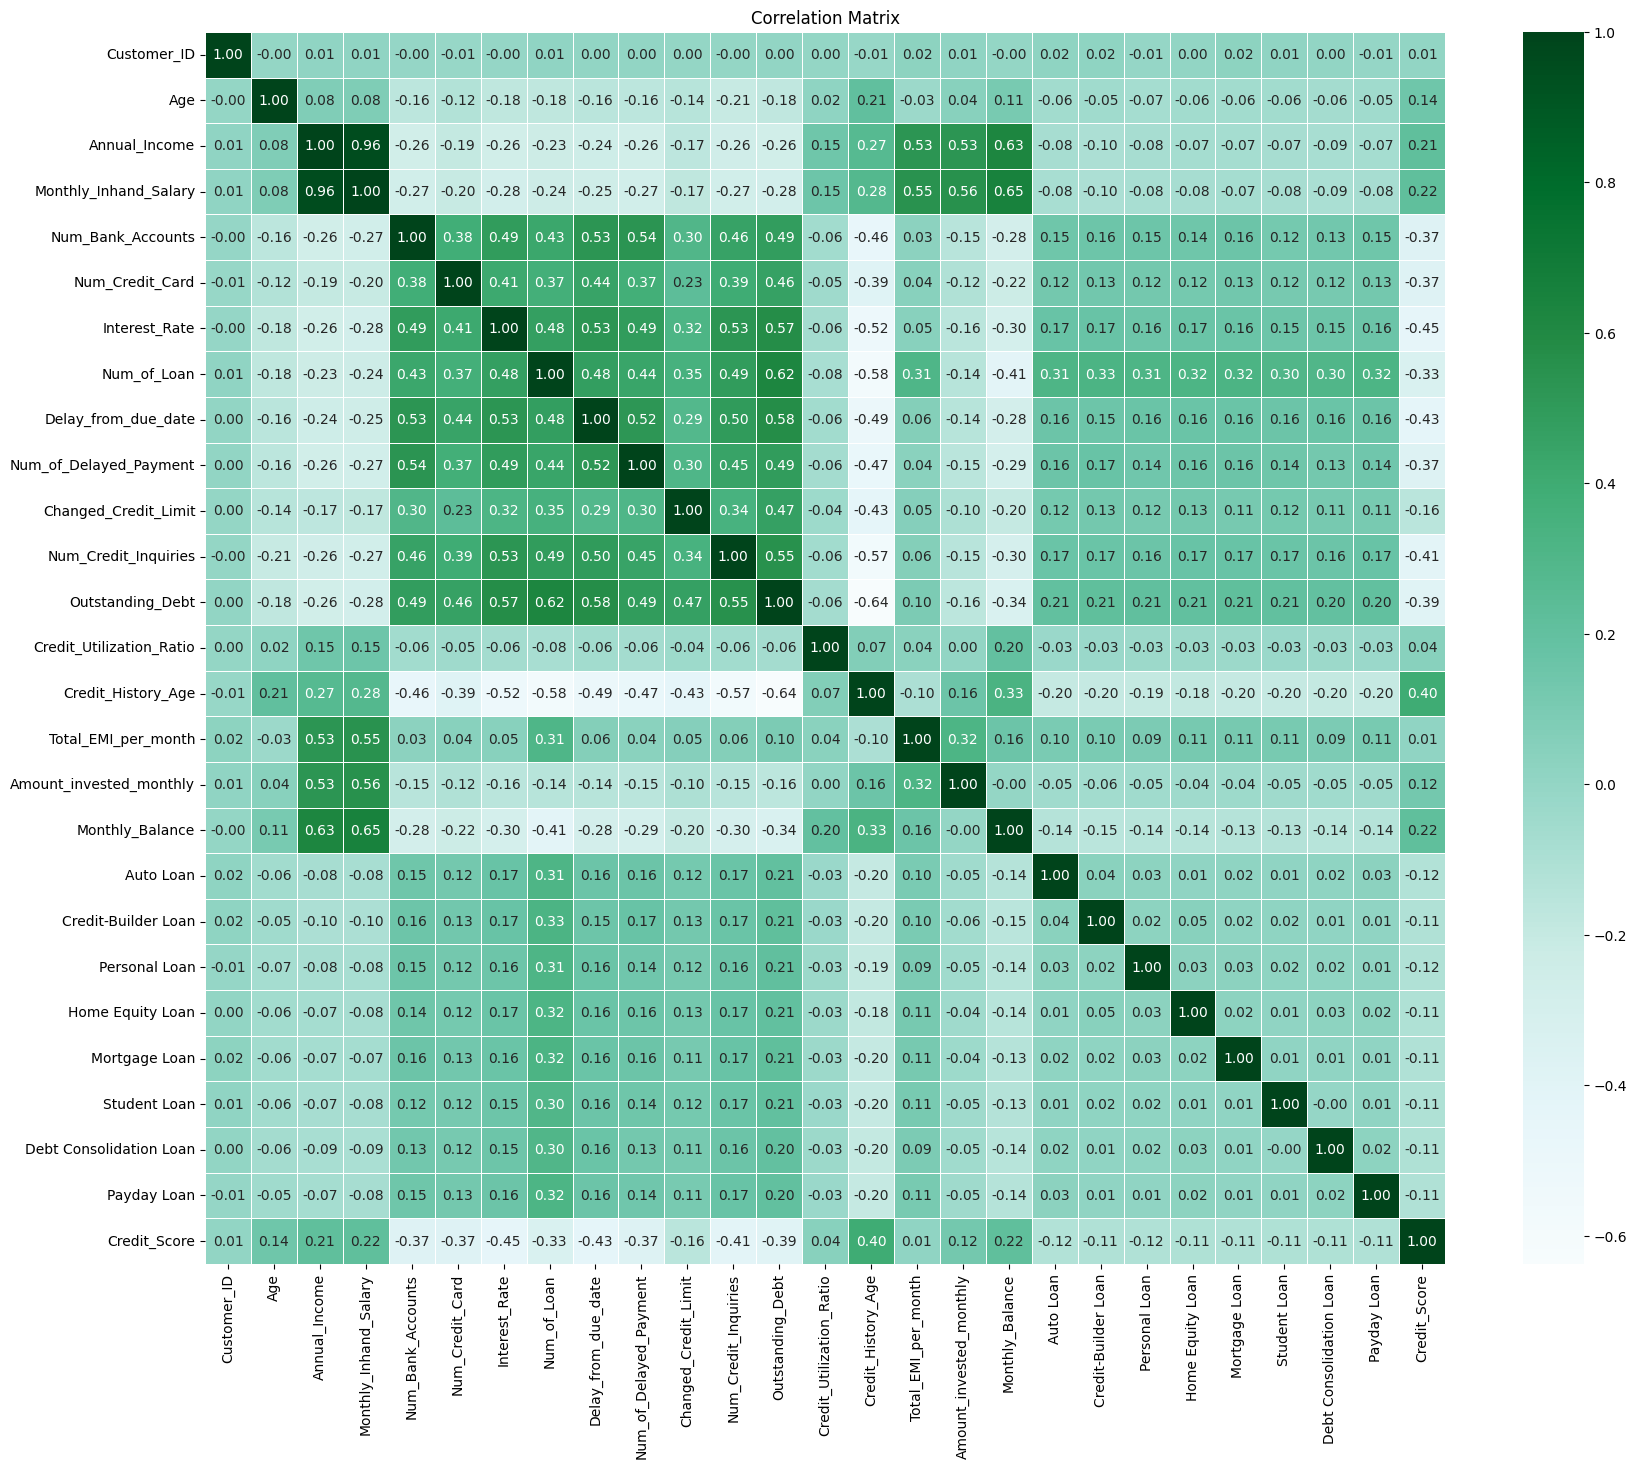

In [ ]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
pd.set_option('display.max_columns', 35)

df

Customer_ID     Month   Age Occupation  Annual_Income  \
0             3392   January  23.0  Scientist       19114.12   
1             3392  February  23.0  Scientist       19114.12   
2             3392     March  23.0  Scientist       19114.12   
3             3392     April  23.0  Scientist       19114.12   
4             3392       May  23.0  Scientist       19114.12   
...            ...       ...   ...        ...            ...   
99995        37932     April  25.0   Mechanic       39628.99   
99996        37932       May  25.0   Mechanic       39628.99   
99997        37932      June  25.0   Mechanic       39628.99   
99998        37932      July  25.0   Mechanic       39628.99   
99999        37932    August  25.0   Mechanic       39628.99   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                3.0              4.0   
1                1824.843333                3.0              4.0   
2                1824.843333                3.0              4.0   
3                1824.843333                3.0              4.0   
4                1824.843333                3.0              4.0   
...                      ...                ...              ...   
99995            3359.415833                4.0              6.0   
99996            3359.415833                4.0              6.0   
99997            3359.415833                4.0              6.0   
99998            3359.415833                4.0              6.0   
99999            3359.415833                4.0              6.0   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  3          4.0                  3.0   
1                  3          4.0                 -1.0   
2                  3          4.0                  3.0   
3                  3          4.0                  5.0   
4                  3          4.0                  6.0   
...              ...          ...                  ...   
99995              7          2.0                 23.0   
99996              7          2.0                 18.0   
99997             43          2.0                 27.0   
99998              7          2.0                 20.0   
99999              7          2.0                 18.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                         7.0                 11.27                   4.0   
1                         6.5                 11.27                   4.0   
2                         7.0                 11.27                   4.0   
3                         4.0                  6.27                   4.0   
4                         6.5                 11.27                   4.0   
...                       ...                   ...                   ...   
99995                     7.0                 11.50                   3.0   
99996                     7.0                 11.50                   3.0   
99997                     6.0                 11.50                   3.0   
99998                     6.0                 11.50                   3.0   
99999                     6.0                 11.50                   3.0   

      Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           Good            809.98                 26.822620   
1           Good            809.98                 31.944960   
2           Good            809.98                 28.609352   
3           Good            809.98                 31.377862   
4           Good            809.98                 24.797347   
...          ...               ...                       ...   
99995       Good            502.38                 34.663572   
99996       Good            502.38                 40.565631   
99997       Good            502.38                 41.255522   
99998       Good            502.38                 33.638208   
99999       Good            502.38                 34.192463   

       Credit_History_Age Paym

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

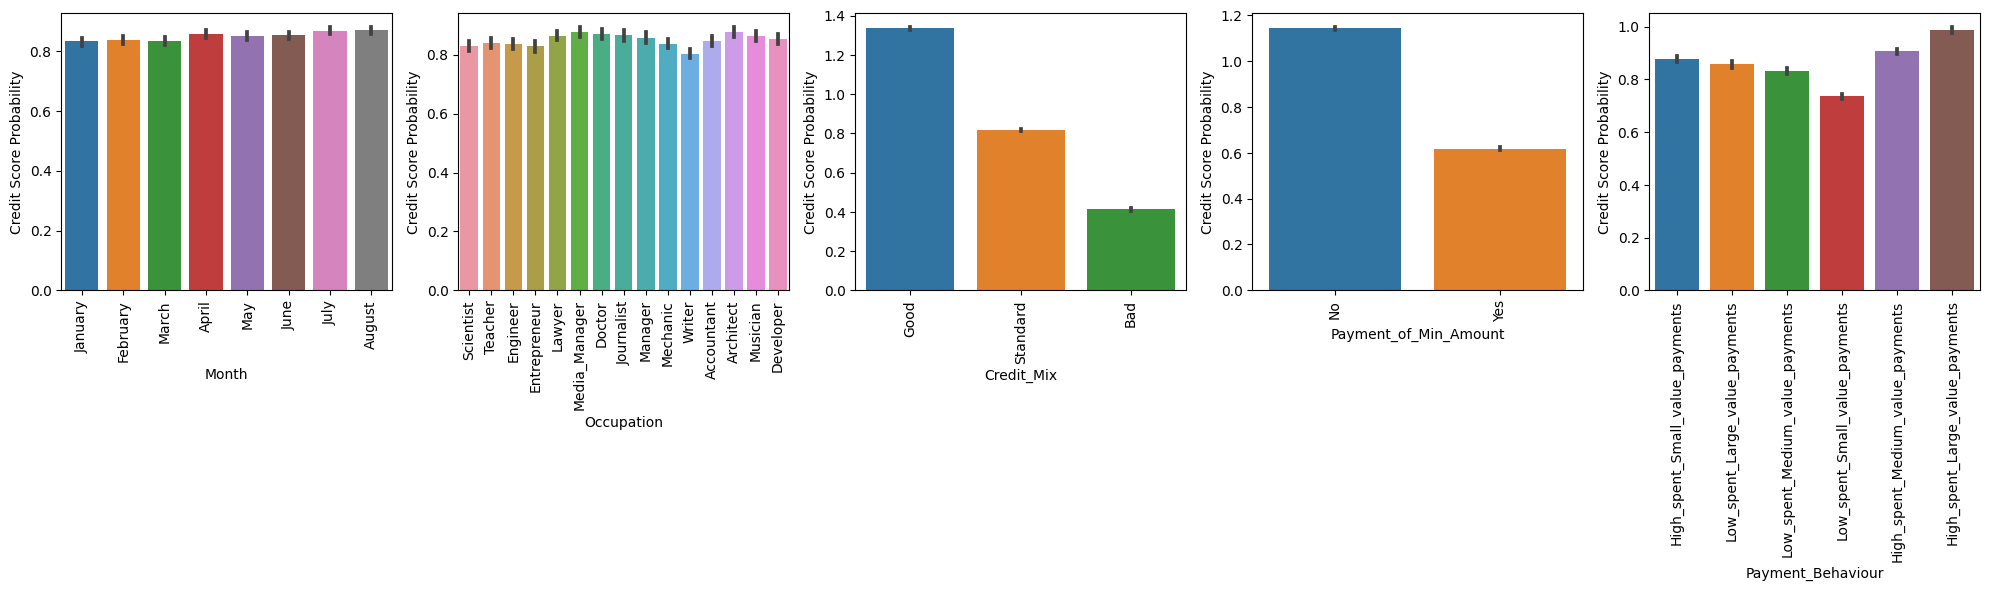

In [ ]:
plt.figure(figsize=(20, 6))

for i, col in enumerate(cat_cols, start=1):
    plt.subplot(1, len(cat_cols), i)
    g = sns.barplot(x=col, y='Credit_Score', data=df)
    g.set_ylabel('Credit Score Probability')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
q_test_cols = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

test_df = df[q_test_cols]
test_df['Credit_Score'] = df['Credit_Score']

test_df

Month Occupation Credit_Mix Payment_of_Min_Amount  \
0       January  Scientist       Good                    No   
1      February  Scientist       Good                    No   
2         March  Scientist       Good                    No   
3         April  Scientist       Good                    No   
4           May  Scientist       Good                    No   
...         ...        ...        ...                   ...   
99995     April   Mechanic       Good                    No   
99996       May   Mechanic       Good                    No   
99997      June   Mechanic       Good                    No   
99998      July   Mechanic       Good                    No   
99999    August   Mechanic       Good                    No   

                      Payment_Behaviour  Credit_Score  
0       High_spent_Small_value_payments             2  
1        Low_spent_Large_value_payments             2  
2       Low_spent_Medium_value_payments             2  
3        Low_spent_Small_value_payments             2  
4      High_spent_Medium_value_payments             2  
...                                 ...           ...  
99995   High_spent_Large_value_payments             0  
99996  High_spent_Medium_value_payments             0  
99997   High_spent_Large_value_payments             0  
99998    Low_spent_Large_value_payments             1  
99999   High_spent_Large_value_payments             0  

[88592 rows x 6 columns]

In [ ]:
from scipy import stats

def chi_square_test(data, col1, col2='Credit_Score'):
    occ = data[[col1, col2]]
    table = pd.crosstab(index=occ[col1], columns=occ[col2])

    t, p, sd, expected = stats.chi2_contingency(table)

    return t, p

In [ ]:
cols, values, p_values = [], [], []

for col in test_df.columns[:-1].tolist():
    cols.append(col)
    t, p = chi_square_test(test_df, col)
    values.append(round(t, 2))
    p_values.append(round(p, 2))

chi_df = pd.DataFrame({
    'Variable': cols,
    'Value': values,
    'Pvalue': p_values
})

chi_df = chi_df.sort_values(by='Value', ascending=False)
chi_df.style.bar('Value').background_gradient('Blues', subset='Value')

In [ ]:
df.drop(['Month', 'Occupation'], axis=1, inplace=True)

In [ ]:
df_numeric = df.select_dtypes(include=['int', 'float'])
df_numeric.columns

Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Auto Loan', 'Credit-Builder Loan', 'Personal Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Student Loan',
       'Debt Consolidation Loan', 'Payday Loan', 'Credit_Score'],
      dtype='object')

In [ ]:
len(df_numeric.columns)

27

In [ ]:
cols_to_drop = [
    'Auto Loan', 'Credit-Builder Loan', 'Personal Loan',
    'Home Equity Loan', 'Mortgage Loan', 'Student Loan',
    'Debt Consolidation Loan', 'Payday Loan'
]

df_numeric.drop(cols_to_drop, axis=1, inplace=True)

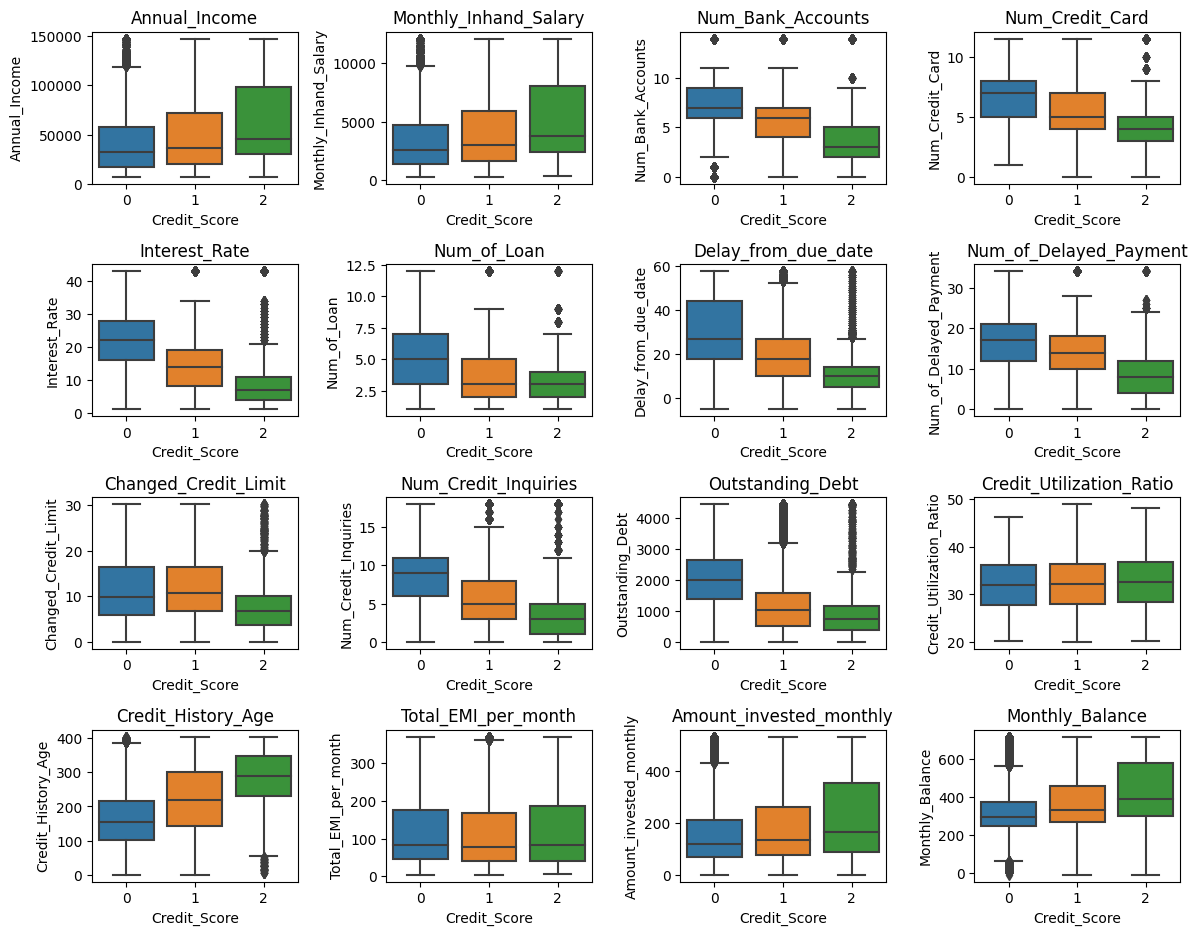

In [ ]:
plt.figure(figsize=(12, 16))

for ax, col in enumerate(df_numeric.columns[2:-1]):
    plt.subplot(7, 4, ax + 1)
    plt.title(col)
    sns.boxplot(x='Credit_Score', y=col, data=df_numeric)

plt.tight_layout()

In [ ]:
import pingouin as pg

def anova_test(data, col1, col2='Credit_Score'):
    df = data[[col1, col2]]
    df_melted = pd.melt(df, id_vars=col2, var_name=col1, value_name='value')
    test = pg.welch_anova(data=df_melted, dv='value', between=col2)

    return test

In [ ]:
cols, values, p_values = [], [], []

for col in df_numeric.columns[:-1]:
    cols.append(col)
    test = anova_test(df , col)
    values.append(round(float(test['F'].values), 2))
    p_values.append(round(float(test['p-unc'].values), 2))

anova_df = pd.DataFrame({
    'Variable': cols,
    'Value': values,
    'Pvalue': p_values
})

anova_df = anova_df.sort_values(by='Value', ascending=False)
anova_df.style.bar('Value').background_gradient('Blues', subset='Value')

In [ ]:
cols_to_drop = anova_df['Variable'][-3:].tolist()

df.drop(cols_to_drop, axis=1, inplace=True)

df.shape

(88592, 27)

In [ ]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan',
       'Mortgage Loan', 'Student Loan', 'Debt Consolidation Loan',
       'Payday Loan', 'Credit_Score'],
      dtype='object')

In [ ]:
features = df.drop('Credit_Score',axis=1)
label = df['Credit_Score']

In [ ]:
cat_col = features.select_dtypes(include='object').columns.tolist()
cat_col

['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [ ]:
for col in cat_col:
    print(features[col].value_counts())
    print()

Standard    40736
Good        24088
Bad         23768
Name: Credit_Mix, dtype: int64

Yes    49515
No     39077
Name: Payment_of_Min_Amount, dtype: int64

Low_spent_Small_value_payments      25227
High_spent_Medium_value_payments    16993
High_spent_Large_value_payments     13199
Low_spent_Medium_value_payments     12887
High_spent_Small_value_payments     10613
Low_spent_Large_value_payments       9673
Name: Payment_Behaviour, dtype: int64



In [ ]:
cred_mix = {
    'Bad': 0,
    'Standard': 1,
    'Good': 2
}

features['Credit_Mix'] = features['Credit_Mix'].map(cred_mix)

min_pay = {
    'No': 0,
    'Yes': 1,
}

features['Payment_of_Min_Amount'] = features['Payment_of_Min_Amount'].map(min_pay)

In [ ]:
for col in cat_col[2:]:
    print(features[col].value_counts())
    print()

Low_spent_Small_value_payments      25227
High_spent_Medium_value_payments    16993
High_spent_Large_value_payments     13199
Low_spent_Medium_value_payments     12887
High_spent_Small_value_payments     10613
Low_spent_Large_value_payments       9673
Name: Payment_Behaviour, dtype: int64



In [ ]:
features = pd.get_dummies(features, columns=['Payment_Behaviour'], drop_first=True, dtype=int)
features.shape

(88592, 30)

In [ ]:
features.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0              3          4.0                  3.0   
1              4.0              3          4.0                 -1.0   
2              4.0              3          4.0                  3.0   
3              4.0              3          4.0                  5.0   
4              4.0              3          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     6.5                 11.27                   4.0   
2                     7.0                 11.27                   4.0   
3                     4.0                  6.27                   4.0   
4                     6.5                 11.27                   4.0   

   Credit_Mix  Outstanding_Debt  Credit_History_Age  Payment_of_Min_Amount  \
0           2            809.98               265.0                      0   
1           2            809.98               268.5                      0   
2           2            809.98               267.0                      0   
3           2            809.98               268.0                      0   
4           2            809.98               269.0                      0   

   Amount_invested_monthly  Monthly_Balance  Auto Loan  Credit-Builder Loan  \
0                80.415295       312.494089          1                    1   
1               118.280222       284.629162          1                    1   
2                81.699521       331.209863          1                    1   
3               199.458074       223.451310          1                    1   
4                41.420153       341.489231          1                    1   

   Personal Loan  Home Equity Loan  Mortgage Loan  Student Loan  \
0              1                 1              0             0   
1              1                 1              0             0   
2              1                 1              0             0   
3              1                 1              0             0   
4              1                 1              0             0   

   Debt Consolidation Loan  Payday Loan  \
0                        0            0   
1                        0            0   
2                        0            0   
3                        0            0   
4                        0            0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  1    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                  1   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                                 0   
1                                                 1   
2                                                 0   
3                                                 0   
4                                                 0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                  0   


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88592 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 88592 non-null  float64
 1   Annual_Income                                       88592 non-null  float64
 2   Monthly_Inhand_Salary                               88592 non-null  float64
 3   Num_Bank_Accounts                                   88592 non-null  float64
 4   Num_Credit_Card                                     88592 non-null  float64
 5   Interest_Rate                                       88592 non-null  int64  
 6   Num_of_Loan                                         88592 non-null  float64
 7   Delay_from_due_date                                 88592 non-null  float64
 8   Num_of_Delayed_Payment                              88592 non-null  float64


In [ ]:
float_cols_with_integers = df.select_dtypes(include='float').apply(lambda col: col.apply(lambda x: x.is_integer())).all()
float_cols_to_convert = float_cols_with_integers[float_cols_with_integers].index
float_cols_to_convert

Index(['Num_Bank_Accounts', 'Num_of_Loan'], dtype='object')

In [ ]:
features[float_cols_to_convert] = features[float_cols_to_convert].astype(int)

In [ ]:
cols = ['Age', 'Credit_History_Age']
features[cols] = features[cols].astype(int)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88592 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 88592 non-null  int64  
 1   Annual_Income                                       88592 non-null  float64
 2   Monthly_Inhand_Salary                               88592 non-null  float64
 3   Num_Bank_Accounts                                   88592 non-null  int64  
 4   Num_Credit_Card                                     88592 non-null  float64
 5   Interest_Rate                                       88592 non-null  int64  
 6   Num_of_Loan                                         88592 non-null  int64  
 7   Delay_from_due_date                                 88592 non-null  float64
 8   Num_of_Delayed_Payment                              88592 non-null  float64


In [ ]:
label.value_counts()

1    46546
0    27662
2    14384
Name: Credit_Score, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(features, label)

y.value_counts()

2    46546
1    46546
0    46546
Name: Credit_Score, dtype: int64

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# X

### Modelling

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(X, y, t_size=0.2):
    return train_test_split(X, y, test_size=t_size, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def train_models(X_train, X_test, y_train, y_test):
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(X_train, y_train)
    naive_bayes_predictions = naive_bayes_model.predict(X_test)

    decision_tree_model = DecisionTreeClassifier(random_state=42)
    decision_tree_model.fit(X_train, y_train)
    decision_tree_predictions = decision_tree_model.predict(X_test)

    random_forest_model = RandomForestClassifier(random_state=42)
    random_forest_model.fit(X_train, y_train)
    random_forest_predictions = random_forest_model.predict(X_test)

    print('\nNaive Bayes Classification Report:\n', classification_report(y_test, naive_bayes_predictions))
    print('\nDecision Tree Classification Report:\n', classification_report(y_test, decision_tree_predictions))
    print('\nRandom Forest Classification Report:\n', classification_report(y_test, random_forest_predictions))

    return naive_bayes_predictions, decision_tree_predictions, random_forest_predictions

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def plot_perf(y_test, nb_preds, dt_preds, rf_preds, title):
    models = ['Naive Bayes', 'Decision Tree', 'Random Forest']
    preds = [nb_preds, dt_preds, rf_preds]

    scores = {
        'Precision': [precision_score(y_test, pred, average='weighted') for pred in preds],
        'Recall': [recall_score(y_test, pred, average='weighted')for pred in preds],
        'F1-Score': [f1_score(y_test, pred, average='weighted') for pred in preds],
        'Accuracy':[accuracy_score(y_test, pred) for pred in preds]
    }

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
    fig.suptitle(title)

    for i, (metric, vals) in enumerate(scores.items()):
        x, y = i // 2, i % 2
        plot = sns.barplot(x=vals, y=models, ax=axes[x, y], palette='viridis')
        axes[x, y].set_title(metric)
        axes[x, y].set_xticks(np.arange(0, 1.1, 0.2))
        for index, value in enumerate(vals):
            plot.text(value, index, f'{value:.3f}', ha='left', va='center', color='black')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_matrix(y_test, nb_preds, dt_preds, rf_preds, title):
    models_preds = {
        'Naive Bayes': nb_preds,
        'Decision Tree': dt_preds,
        'Random Fores': rf_preds
    }

    colors = ['Reds', 'Blues', 'Greens']

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle(title)

    for i, (model_name, y_pred) in enumerate(models_preds.items()):
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap=colors[i], cbar=False, ax=axes[i])
        ax.set_title(model_name)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = split_data(X, y)

nb_preds, dt_preds, rf_preds = train_models(X_train, X_test, y_train, y_test)


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.73      9261
           1       0.66      0.29      0.41      9381
           2       0.60      0.89      0.72      9286

    accuracy                           0.65     27928
   macro avg       0.65      0.65      0.62     27928
weighted avg       0.65      0.65      0.62     27928


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      9261
           1       0.71      0.68      0.69      9381
           2       0.83      0.84      0.84      9286

    accuracy                           0.77     27928
   macro avg       0.77      0.77      0.77     27928
weighted avg       0.77      0.77      0.77     27928


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      9261
           1  

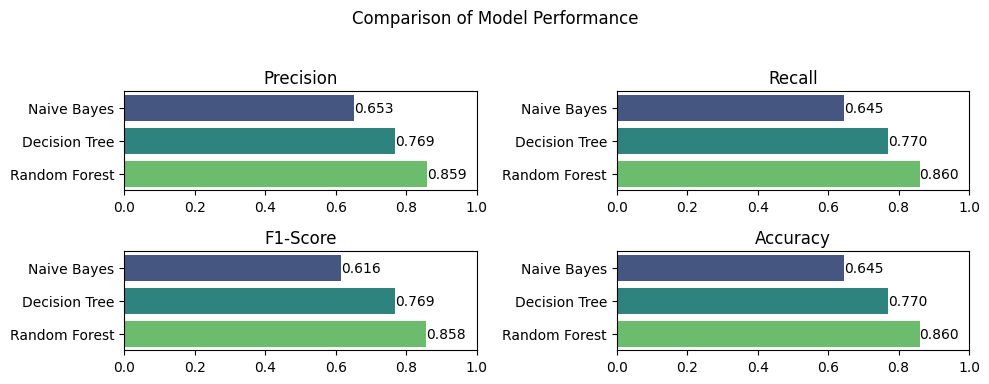

In [ ]:
plot_perf(y_test, nb_preds, dt_preds, rf_preds, 'Comparison of Model Performance')

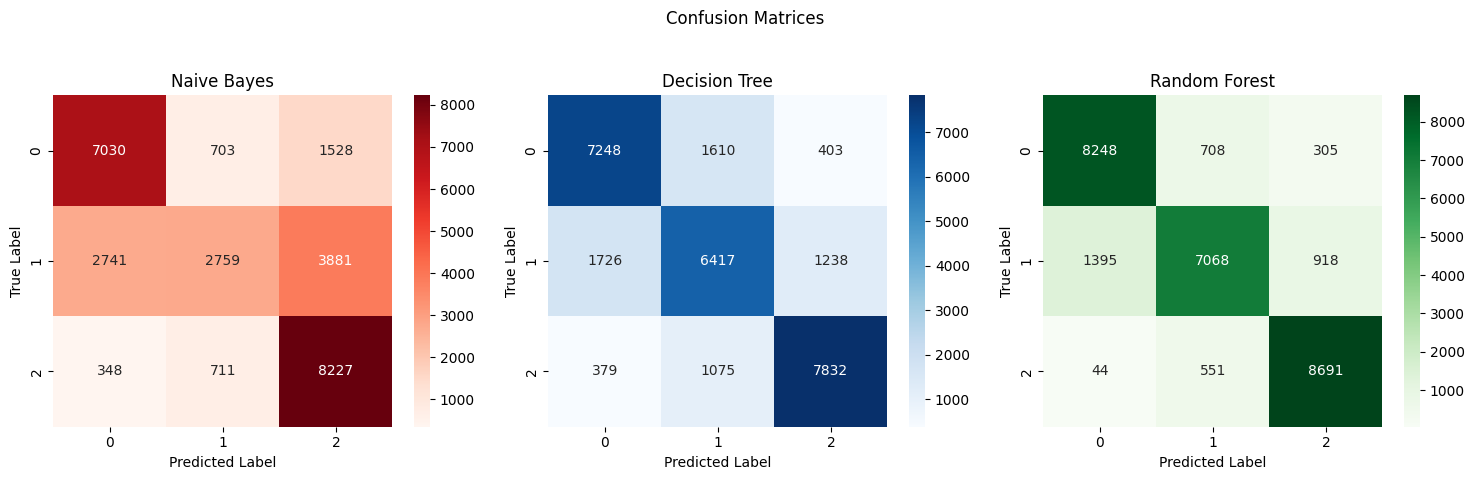

In [ ]:
plot_matrix(y_test, nb_preds, dt_preds, rf_preds, 'Confusion Matrices')

### Performance Improvement (Further Dimensionality Reduction)

In [ ]:
temp_df = X.copy()
temp_df['Score'] = y

temp_df.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23       19114.12            1824.843333                  3   
1   23       19114.12            1824.843333                  3   
2   23       19114.12            1824.843333                  3   
3   23       19114.12            1824.843333                  3   
4   23       19114.12            1824.843333                  3   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0              3            4                  3.0   
1              4.0              3            4                 -1.0   
2              4.0              3            4                  3.0   
3              4.0              3            4                  5.0   
4              4.0              3            4                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     6.5                 11.27                   4.0   
2                     7.0                 11.27                   4.0   
3                     4.0                  6.27                   4.0   
4                     6.5                 11.27                   4.0   

   Credit_Mix  Outstanding_Debt  Credit_History_Age  Payment_of_Min_Amount  \
0           2            809.98                 265                      0   
1           2            809.98                 268                      0   
2           2            809.98                 267                      0   
3           2            809.98                 268                      0   
4           2            809.98                 269                      0   

   Amount_invested_monthly  Monthly_Balance  Auto Loan  Credit-Builder Loan  \
0                80.415295       312.494089          1                    1   
1               118.280222       284.629162          1                    1   
2                81.699521       331.209863          1                    1   
3               199.458074       223.451310          1                    1   
4                41.420153       341.489231          1                    1   

   Personal Loan  Home Equity Loan  Mortgage Loan  Student Loan  \
0              1                 1              0             0   
1              1                 1              0             0   
2              1                 1              0             0   
3              1                 1              0             0   
4              1                 1              0             0   

   Debt Consolidation Loan  Payday Loan  \
0                        0            0   
1                        0            0   
2                        0            0   
3                        0            0   
4                        0            0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  1    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                  1   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                                 0   
1                                                 1   
2                                                 0   
3                                                 0   
4                                                 0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                  0   
1    

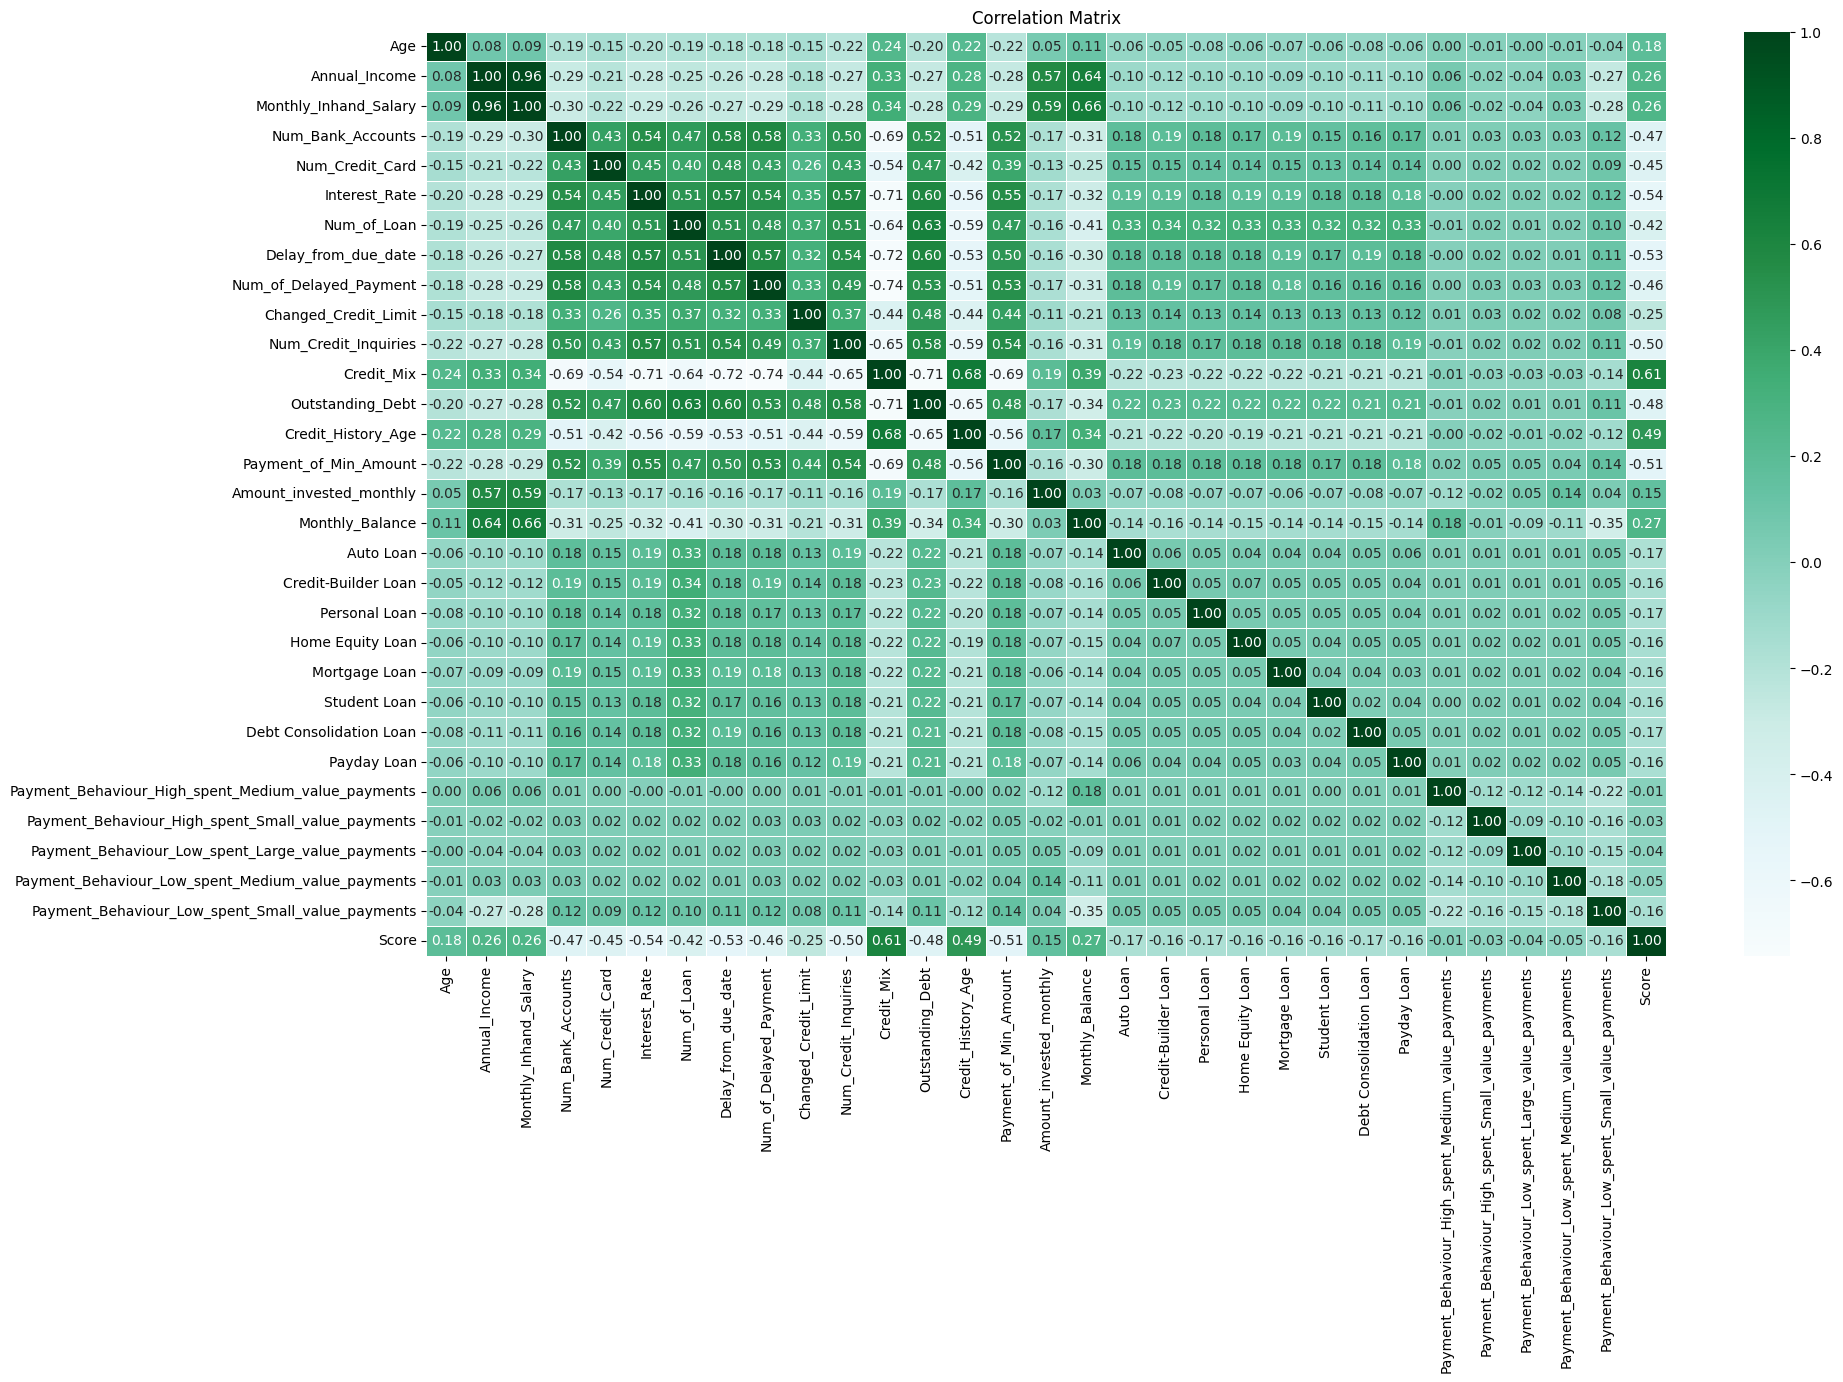

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(temp_df.corr(), annot=True, cmap='BuGn', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X.shape

(139638, 30)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
selector = SelectFromModel(model)
X_train_selected = selector.fit_transform(X, y)

X_train_selected = pd.DataFrame(X_train_selected, columns=X.columns[selector.get_support()])
X_train_selected

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       23.0   19114.120000            1824.843333                3.0   
1       23.0   19114.120000            1824.843333                3.0   
2       23.0   19114.120000            1824.843333                3.0   
3       23.0   19114.120000            1824.843333                3.0   
4       23.0   19114.120000            1824.843333                3.0   
...      ...            ...                    ...                ...   
139633  23.0  127284.180000           10389.015000                3.0   
139634  41.0   65588.100000            4813.717403                7.0   
139635  28.0  147584.555000           12073.911250                2.0   
139636  48.0  134775.960000           11379.330000                0.0   
139637  28.0  121688.141237            9871.522345                1.0   

        Num_Credit_Card  Interest_Rate  Delay_from_due_date  \
0              4.000000            3.0             3.000000   
1              4.000000            3.0            -1.000000   
2              4.000000            3.0             3.000000   
3              4.000000            3.0             5.000000   
4              4.000000            3.0             6.000000   
...                 ...            ...                  ...   
139633         3.000000            4.0            15.000000   
139634         4.000000           11.0            22.479666   
139635         4.267786            5.0             5.928855   
139636         3.000000           11.0             2.063610   
139637         1.000000           11.0            14.065639   

        Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.000000             11.270000              4.000000   
1                     6.500000             11.270000              4.000000   
2                     7.000000             11.270000              4.000000   
3                     4.000000              6.270000              4.000000   
4                     6.500000             11.270000              4.000000   
...                        ...                   ...                   ...   
139633                4.430212              2.250000              3.000000   
139634               17.000000              8.330000              0.000000   
139635                4.803359              4.454046              1.732214   
139636                2.127220              0.950000              4.000000   
139637                0.934361              0.907220              1.000000   

        Credit_Mix  Outstanding_Debt  Credit_History_Age  \
0              2.0        809.980000               265.0   
1              2.0        809.980000               268.0   
2              2.0        809.980000               267.0   
3              2.0        809.980000               268.0   
4              2.0        809.980000               269.0   
...            ...               ...                 ...   
139633         2.0        689.480000               312.0   
139634         2.0       1292.140000               373.0   
139635         2.0       1271.777769               368.0   
139636         2.0       1370.190000               267.0   
139637         2.0        972.348295               192.0   

        Payment_of_Min_Amount  Amount_invested_monthly  Monthly_Balance  
0                         0.0                80.415295       312.494089  
1                         0.0               118.280222       284.629162  
2                         0.0                81.699521       331.209863  
3                         0.0               199.458074       223.451310  
4                         0.0                41.420153       341.489231  
...                       ...                      ...              ...  
139633                    0.0               379.590970       717.804113  
139634                    0.0               479.253646       214.010067  
139635                    0.0               530.382

In [ ]:
X_train, X_test, y_train, y_test = split_data(X_train_selected, y)

nb_preds2, dt_preds2, rf_preds2 = train_models(X_train, X_test, y_train, y_test)


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.73      9261
           1       0.66      0.32      0.43      9381
           2       0.61      0.87      0.72      9286

    accuracy                           0.65     27928
   macro avg       0.66      0.65      0.63     27928
weighted avg       0.66      0.65      0.63     27928


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      9261
           1       0.74      0.73      0.74      9381
           2       0.87      0.88      0.87      9286

    accuracy                           0.81     27928
   macro avg       0.81      0.81      0.81     27928
weighted avg       0.81      0.81      0.81     27928


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      9261
           1  

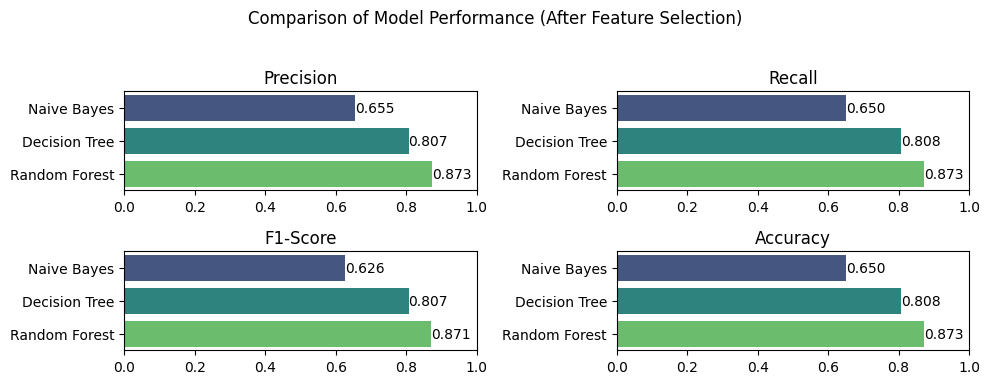

In [ ]:
plot_perf(y_test, nb_preds2, dt_preds2, rf_preds2, 'Comparison of Model Performance (After Feature Selection)')

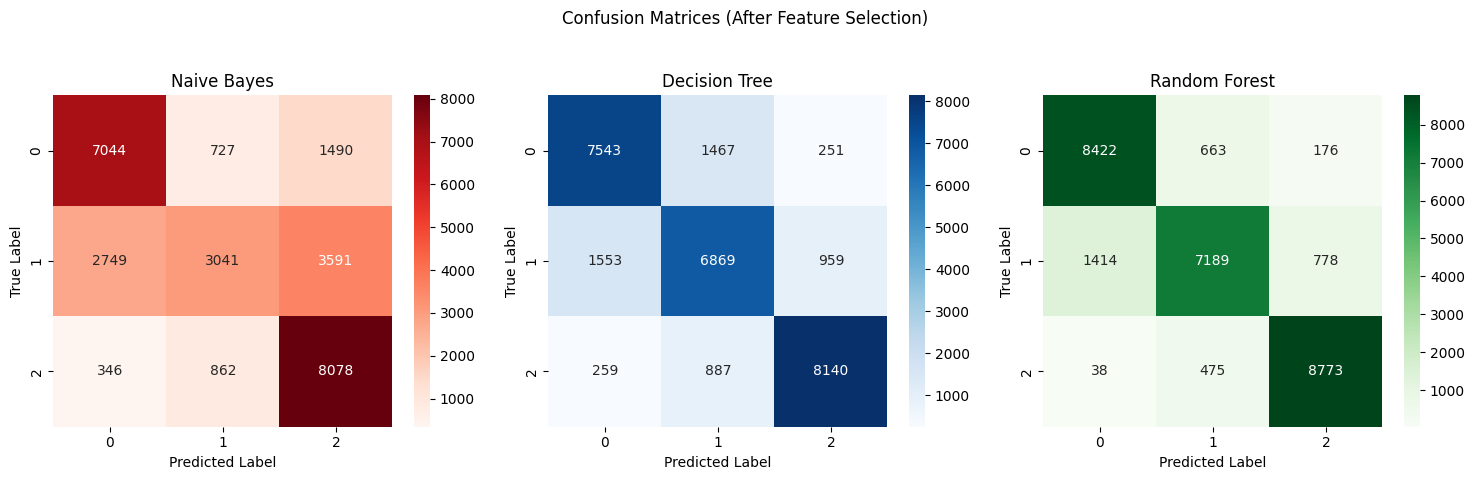

In [ ]:
plot_matrix(y_test, nb_preds2, dt_preds2, rf_preds2, 'Confusion Matrices (After Feature Selection)')

### Comparative Analysis

In [ ]:
from time import perf_counter

def get_performance(train_sizes):
    acc_list, precisions, recalls, f1_scores, durations = [], [], [], [], []

    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = split_data(X_train_selected, y, 1 - train_size)

        model = RandomForestClassifier(n_estimators=50)

        start = perf_counter()
        model.fit(X_train, y_train)
        end = perf_counter()

        y_pred = model.predict(X_test)

        durations.append(end - start)
        acc_list.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    return acc_list, precisions, recalls, f1_scores, durations

In [ ]:
train_sizes = list(np.arange(0.5, 0.91, 0.1))
train_sizes = [np.round(size, 2) for size in train_sizes]

acc_list, precisions, recalls, f1_scores, durations1 = get_performance(train_sizes)

In [ ]:
from sklearn.model_selection import cross_val_score

def get_cv_scores(folds):
    cv_scores, durations = [], []
    X_train, X_test, y_train, y_test = split_data(X_train_selected, y, 0.2)

    for k in folds:
        model = RandomForestClassifier(n_estimators=50)

        start = perf_counter()
        scores = cross_val_score(model, X_train, y_train, cv=k)
        end = perf_counter()

        durations.append(end - start)
        cv_scores.append(scores.mean())
        # print(f'done for {k}')

    return cv_scores, durations

In [ ]:
folds = list(np.arange(3, 12, 2))

cv_scores, durations2 = get_cv_scores(folds)

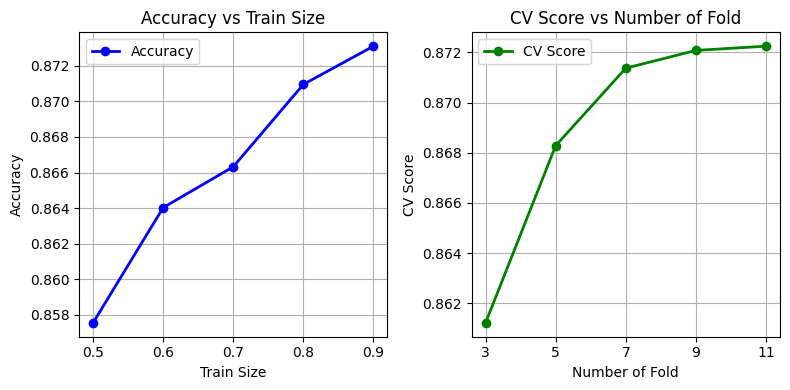

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, acc_list, marker='o', label='Accuracy', linewidth=2, color='blue')
plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Train Size')
plt.xticks(train_sizes)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(folds, cv_scores, marker='o', label='CV Score', linewidth=2, color='green')
plt.xlabel('Number of Fold')
plt.ylabel('CV Score')
plt.title('CV Score vs Number of Fold')
plt.xticks(folds)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

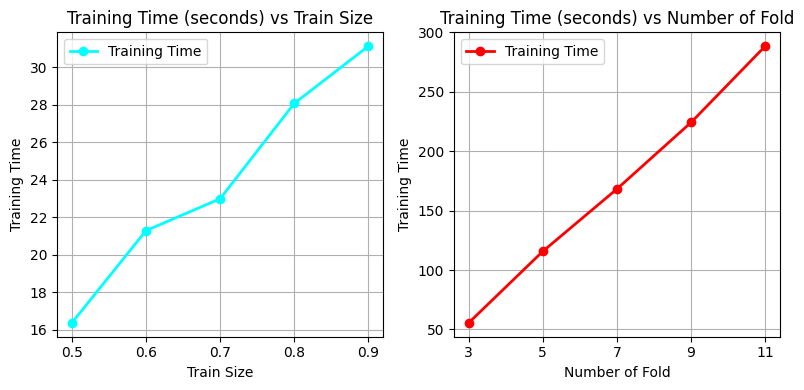

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, durations1, marker='o', label='Training Time', linewidth=2, color='cyan')
plt.xlabel('Train Size')
plt.ylabel('Training Time')
plt.title('Training Time (seconds) vs Train Size')
plt.xticks(train_sizes)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(folds, durations2, marker='o', label='Training Time', linewidth=2, color='red')
plt.xlabel('Number of Fold')
plt.ylabel('Training Time')
plt.title('Training Time (seconds) vs Number of Fold')
plt.xticks(folds)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

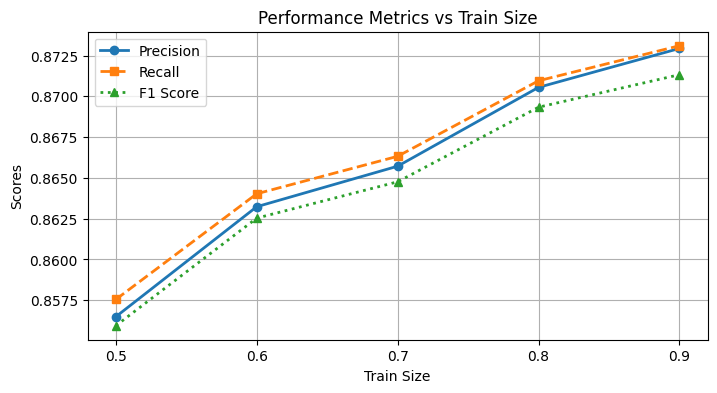

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(train_sizes, precisions, label='Precision', linewidth=2, linestyle='-', marker='o')
plt.plot(train_sizes, recalls, label='Recall', linewidth=2, linestyle='--', marker='s')
plt.plot(train_sizes, f1_scores, label='F1 Score', linewidth=2, linestyle=':', marker='^')

plt.xlabel('Train Size')
plt.ylabel('Scores')
plt.title('Performance Metrics vs Train Size')
plt.xticks(train_sizes)
plt.legend()
plt.grid(True)
plt.show()